In [4]:
import pandas as pd; from scipy import stats;

In [5]:
from phcalc import calc_pH

In [6]:
#file is named by 2 digit date m, d, y and short name of VELMA run created in DOC check which is the precursor for the pH calculation
data_df=pd.read_csv('111921_WQX_Loss15OCT21F.csv') #can change path -cp with true file directory but copying in this folder
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
0           0                                0.038477   
1           1                                0.003461   
2           2                                0.002371   
3           3                                0.001990   
4           4                                0.001735   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001146   
1                                0.000104   
2                                0.000071   
3                                0.000060   
4                                0.000052   

   Runoff_All(mm/day)_Delineated_Average  \
0                               3.575873   
1                               0.725718   
2                               0.445550   
3                               0.409570   
4                               0.383245   

   NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
0                                0.000026  1998   
1                                0.000003  1998   
2                                0.000002  1998   
3                                0.000002  1998   
4                                0.000001  1998   

   NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.000128     0  0.109935            2.6375   
1                                0.000011     1  0.009887            3.3125   
2                                0.000007     2  0.006773            0.7625   
3                                0.000006     3  0.005685            0.0875   
4                                0.000005     4  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [10]:
#Check for any zero runoff days should equal 0
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, DOC_Loss(gC/day/m2)_Delineated_Average, DON_Loss(gN/day/m2)_Delineated_Average, Runoff_All(mm/day)_Delineated_Average, NH4_Loss(gN/day/m2)_Delineated_Average, Year, NO3_Loss(gN/day/m2)_Delineated_Average, Step, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [11]:
pools_di=pd.read_csv('BC15OCT21FWQDI_pHcalc.csv') #need to change paths or copy and paste file in dir

In [12]:
#VELMA Simulation focusing on Water Quality Parameters Before renaming as concentrations
pools_di.drop(columns={'Unnamed: 0','Criteria', 'Condition'})

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               4.914795                          178.441696   
1                               4.915759                          178.600606   
2                               4.916773                          178.762523   
3                               4.917767                          178.922577   
4                               4.918738                          179.075808   
...                                  ...                                 ...   
1973                            6.270598                         3926.155483   
1974                            6.270870                         3926.278948   
1975                            6.271133                         3926.435896   
1976                            6.271411                         3926.861747   
1977                            6.271661                         3926.978237   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                               0.653129                            0.017829   
1                               0.656923                            0.018524   
2                               0.652833                            0.018774   
3                               0.649692                            0.018661   
4                               0.648918                            0.018418   
...                                  ...                                 ...   
1973                            5.420575                            1.128994   
1974                            5.438368                            1.128992   
1975                            5.455235                            1.128973   
1976                            5.472657                            1.128974   
1977                            5.488821                            1.128955   

      Step  Runoff_All(mm/day)_Delineated_Average  Sfc_Water_Temp_C  
0     1309                               0.014679         20.112500  
1     1310                               0.022896         19.737500  
2     1311                               0.028915         19.962502  
3     1312                               0.020605         19.812500  
4     1313                               0.015855         19.287498  
...    ...                                    ...               ...  
1973  3282                               0.008217         -1.562500  
1974  3283                               0.008018         -2.837500  
1975  3284                               0.007825         -0.812500  
1976  3285                               0.008044          4.512500  
1977  3286                               0.007484         -2.087500  

[1978 rows x 7 columns]

In [13]:
#Defining Percentiles list for tails and distrubition interval
perc = [0.1, 0.25, 0.5, .75, .9]

In [14]:
pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'}).describe(percentiles =perc)

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.518142                         1850.154128   
std                              0.392550                         1193.881659   
min                              4.914795                          178.441696   
10%                              5.002676                          190.056750   
25%                              5.182841                          802.891824   
50%                              5.462298                         1741.933419   
75%                              5.858224                         2947.617275   
90%                              6.056191                         3430.750349   
max                              6.271661                         3926.978237   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             3.900232                            0.490095   
std                              1.856082                            0.394549   
min                              0.635454                            0.001144   
10%                              1.065425                            0.003425   
25%                              2.561748                            0.232953   
50%                              4.053014                            0.343280   
75%                              5.177954                            0.776626   
90%                              6.298208                            1.146616   
max                              7.870530                            1.908474   

              Step  Runoff_All(mm/day)_Delineated_Average  
count  1978.000000                            1978.000000  
mean   2297.500000                               0.093479  
std     571.143736                               0.751254  
min    1309.000000                               0.000163  
10%    1506.700000                               0.001745  
25%    1803.250000                               0.009101  
50%    2297.500000                               0.026392  
75%    2791.750000                               0.078694  
90%    3088.300000                               0.193820  
max    3286.000000                              32.761269

In [15]:
#Loss Stats 
data_df.describe(percentiles=perc).drop(columns='Year')

Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  3287.000000                             3287.000000   
mean   1643.000000                                0.012778   
std     949.019494                                0.038125   
min       0.000000                                0.000010   
10%     328.600000                                0.000028   
25%     821.500000                                0.000083   
50%    1643.000000                                0.002410   
75%    2464.500000                                0.015793   
90%    2957.400000                                0.032917   
max    3286.000000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             1.581391e-05   
std                              3.706391e-05   
min                              1.531152e-07   
10%                              4.551938e-07   
25%                              1.233630e-06   
50%                              5.843098e-06   
75%                              1.654364e-05   
90%                              3.908298e-05   
max                              1.146204e-03   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.064498   
std                                 0.588327   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001197   
50%                                 0.011942   
75%                                 0.046786   
90%                                 0.141798   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             3.950409e-06   
std                              1.079366e-05   
min                              1.088774e-09   
10%                              1.042998e-08   
25%                              4.258997e-08   
50%                              8.112772e-07   
75%                              3.518954e-06   
90%                              9.929698e-06   
max                              2.702333e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average         Step     DOC_mg/L  \
count                            3.287000e+03  3287.000000  3287.000000   
mean                             1.564240e-06  1643.000000     0.036507   
std                              4.811960e-06   949.019494     0.108927   
min                              1.490474e-11     0.000000     0.000029   
10%                              2.183074e-10   328.600000     0.000081   
25%                              1.307638e-09   821.500000     0.000236   
50%                              4.017582e-07  1643.000000     0.006885   
75%                              1.767648e-06  2464.500000     0.045122   
90%                              4.009417e-06  2957.400000     0.094049   
max                              1.844311e-04  3286.000000     4.762571   

       Sfc_Water_Temp_C          CO2  Alk_140  
count       3287.000000  3287.000000   3287.0  
mean          11.248536     0.009127    140.0  
std            6.931090     0.027232      0.0  
min          -10.562500     0.000007    140.0  
10%            2.262500     0.000020    140.0  
25%            5.787500     0.000059    140.0  
50%           11.112499     0.001721    140.0  
75%           17.712502     0.011281    140.0  
90%           20.412498     0.023512    140.0  
max           24.087502     1.190643    140.0

In [16]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(1.0185015526076311e-05, 1.6668999195098877), mean=0.012777606011581441, variance=0.0014534859084112833, skewness=26.27182191661756, kurtosis=1083.2244079442328)

In [17]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(2.9100044360218036e-05, 4.762571198599679), mean=0.036507445747375536, variance=0.011865191089071702, skewness=26.27182191661756, kurtosis=1083.2244079442323)

In [18]:
"""these are corrected columns needed for pH calculation...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0274836351828915, 2.6374998, 0.1099345407315663, 140.0]

In [19]:
215/(12*0.35)

51.1904761904762

In [20]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.6246280723384432
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 6.012930948721311e-07
SQRT of Alpha= 0.000775430909154472
A value 3.1104568917377766
B value 0.43429448190325176
C value 0.001550861818308944

CO2 Estimate 0.056177268088975
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 5.494267667125262e-08
SQRT of Alpha= 0.00023439854238295216
A value 3.6300450933237793
B value 0.43429448190325176
C value 0.00046879708476590433

CO2 Estimate 0.038485280117138636
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 3.5408561720641985e-08
SQRT of Alpha= 0.00018817162836262533
A value 3.725445856862044
B value 0.43429448190325176
C value 0.00037634325672525066

CO2 Estimate 0.03229998665946364
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 2.922479980135228e-08
SQRT of Alpha= 0.00017095262443540398
A value 3

C value 0.00022517452780303025

CO2 Estimate 0.009583741125602271
Exponent value 5.93053893125
H2CO3 value 1.1734404876188222e-06
pkw= 1e-14
Alpha value= 1.124595985963929e-08
SQRT of Alpha= 0.00010604697006345485
A value 3.974501735478587
B value 0.43429448190325176
C value 0.0002120939401269097

CO2 Estimate 0.00825960944291591
Exponent value 5.91786596937756
H2CO3 value 1.2081866444090015e-06
pkw= 1e-14
Alpha value= 9.979159816965475e-09
SQRT of Alpha= 9.989574473903018e-05
A value 4.000453011030455
B value 0.43429448190325176
C value 0.00019979148947806035

CO2 Estimate 0.007559568772406818
Exponent value 5.939291857250001
H2CO3 value 1.1500272807895741e-06
pkw= 1e-14
Alpha value= 8.693720319272792e-09
SQRT of Alpha= 9.324012183214258e-05
A value 4.030397167680497
B value 0.43429448190325176
C value 0.00018648024366428516

CO2 Estimate 0.0071737143459
Exponent value 5.9424768972500015
H2CO3 value 1.1416240328901498e-06
pkw= 1e-14
Alpha value= 8.18969470236828e-09
SQRT of Alpha= 9.0

A value 4.1699342016856225
B value 0.43429448190325176
C value 0.00013523708278527293

CO2 Estimate 0.003096064066590909
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 4.210890929808299e-09
SQRT of Alpha= 6.48913779311882e-05
A value 4.187813003749124
B value 0.43429448190325176
C value 0.0001297827558623764

CO2 Estimate 0.002934887667727273
Exponent value 5.864102707616641
H2CO3 value 1.3674054055105545e-06
pkw= 1e-14
Alpha value= 4.0131912614165366e-09
SQRT of Alpha= 6.334975344400747e-05
A value 4.198255071042818
B value 0.43429448190325176
C value 0.00012669950688801493

CO2 Estimate 0.003841474585009091
Exponent value 5.875097431250001
H2CO3 value 1.3332222985283698e-06
pkw= 1e-14
Alpha value= 5.121549575964136e-09
SQRT of Alpha= 7.156500245206547e-05
A value 4.1452993095049555
B value 0.43429448190325176
C value 0.00014313000490413094

CO2 Estimate 0.006835679024722727
Exponent value 5.89095597725
H2CO3 value 1.2854169510790212e-06
pk

C value 7.155951719961213e-05

CO2 Estimate 0.0008844185745088058
Exponent value 5.88519213125
H2CO3 value 1.3025903868631068e-06
pkw= 1e-14
Alpha value= 1.1520451331183427e-09
SQRT of Alpha= 3.394179036406805e-05
A value 4.469265253216693
B value 0.43429448190325176
C value 6.78835807281361e-05

CO2 Estimate 0.0007834208415036526
Exponent value 5.885709907250001
H2CO3 value 1.30103833363554e-06
pkw= 1e-14
Alpha value= 1.0192705461652648e-09
SQRT of Alpha= 3.1926016760085574e-05
A value 4.4958552627015695
B value 0.43429448190325176
C value 6.385203352017115e-05

CO2 Estimate 0.0006985526426858571
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 9.228437263992625e-10
SQRT of Alpha= 3.0378343048942984e-05
A value 4.517435917909884
B value 0.43429448190325176
C value 6.075668609788597e-05

CO2 Estimate 0.0006223218087462236
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 8.268758747670969e-10
SQRT of A

pkw= 1e-14
Alpha value= 2.7053080518071664e-10
SQRT of Alpha= 1.644782068180209e-05
A value 4.783891637444568
B value 0.43429448190325176
C value 3.289564136360418e-05

CO2 Estimate 0.0002439927422009143
Exponent value 5.977441957250001
H2CO3 value 1.0533144514835342e-06
pkw= 1e-14
Alpha value= 2.570110814173194e-10
SQRT of Alpha= 1.6031565158066114e-05
A value 4.795024075504312
B value 0.43429448190325176
C value 3.206313031613223e-05

CO2 Estimate 0.0002426127759297907
Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 2.2900578348763705e-10
SQRT of Alpha= 1.513293704102535e-05
A value 4.820076774757894
B value 0.43429448190325176
C value 3.02658740820507e-05

CO2 Estimate 0.00023894665593923188
Exponent value 6.046711883723591
H2CO3 value 8.980243572803142e-07
pkw= 1e-14
Alpha value= 2.145899171241091e-10
SQRT of Alpha= 1.4648887914244858e-05
A value 4.834195343981482
B value 0.43429448190325176
C value 2.9297775828489716e-05

CO2 Estimate 0.0

Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 9.37503655047658e-10
SQRT of Alpha= 3.061868147140987e-05
A value 4.514013515206023
B value 0.43429448190325176
C value 6.123736294281974e-05

CO2 Estimate 0.0009007422917208019
Exponent value 6.006623437250001
H2CO3 value 9.848646800808265e-07
pkw= 1e-14
Alpha value= 8.87119268970878e-10
SQRT of Alpha= 2.9784547486421177e-05
A value 4.526008993706588
B value 0.43429448190325176
C value 5.956909497284235e-05

CO2 Estimate 0.000864413411729945
Exponent value 5.96564157725
H2CO3 value 1.0823268259215043e-06
pkw= 1e-14
Alpha value= 9.3558782420165e-10
SQRT of Alpha= 3.0587380146093746e-05
A value 4.514457719380802
B value 0.43429448190325176
C value 6.117476029218749e-05

CO2 Estimate 0.0008459289359040678
Exponent value 5.950903315250001
H2CO3 value 1.1196871259165454e-06
pkw= 1e-14
Alpha value= 9.471857389720674e-10
SQRT of Alpha= 3.0776382811696166e-05
A value 4.511782424700549
B value 0.43429448

Alpha value= 9.84650251270923e-09
SQRT of Alpha= 9.922954455558702e-05
A value 4.003359001967608
B value 0.43429448190325176
C value 0.00019845908911117404

CO2 Estimate 0.006052972609025
Exponent value 5.90687193125
H2CO3 value 1.2391619481260239e-06
pkw= 1e-14
Alpha value= 7.50062333015288e-09
SQRT of Alpha= 8.660613910198792e-05
A value 4.062451321797681
B value 0.43429448190325176
C value 0.00017321227820397584

CO2 Estimate 0.005774177284304545
Exponent value 5.9299230290463605
H2CO3 value 1.1751058030368266e-06
pkw= 1e-14
Alpha value= 6.785279234549695e-09
SQRT of Alpha= 8.237280640205053e-05
A value 4.084216137559325
B value 0.43429448190325176
C value 0.00016474561280410105

CO2 Estimate 0.006359630126759091
Exponent value 5.93177444525
H2CO3 value 1.1701069388139957e-06
pkw= 1e-14
Alpha value= 7.441457339611343e-09
SQRT of Alpha= 8.626388201102095e-05
A value 4.06417100181226
B value 0.43429448190325176
C value 0.0001725277640220419

CO2 Estimate 0.005196895247759091
Exponent 

SQRT of Alpha= 8.560818086087597e-05
A value 4.067484731433015
B value 0.43429448190325176
C value 0.00017121636172175194

CO2 Estimate 0.006123379783027273
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 8.337274289273974e-09
SQRT of Alpha= 9.130867587077349e-05
A value 4.039487955173361
B value 0.43429448190325176
C value 0.00018261735174154698

CO2 Estimate 0.005512717164834091
Exponent value 5.86043244725
H2CO3 value 1.3790104357828409e-06
pkw= 1e-14
Alpha value= 7.602104499825406e-09
SQRT of Alpha= 8.719004816964724e-05
A value 4.059533082402921
B value 0.43429448190325176
C value 0.00017438009633929447

CO2 Estimate 0.004765317097227273
Exponent value 5.863639567250001
H2CO3 value 1.3688644119441926e-06
pkw= 1e-14
Alpha value= 6.523082986023618e-09
SQRT of Alpha= 8.076560521672339e-05
A value 4.092773548195227
B value 0.43429448190325176
C value 0.00016153121043344679

CO2 Estimate 0.0054556788542522725
Exponent value 5.87023638125
H2CO3 val

H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 3.229025587071983e-09
SQRT of Alpha= 5.682451572228296e-05
A value 4.2454642567914895
B value 0.43429448190325176
C value 0.00011364903144456591

CO2 Estimate 0.0030655286678522727
Exponent value 5.9932458552500005
H2CO3 value 1.0156735546181814e-06
pkw= 1e-14
Alpha value= 3.113586398861456e-09
SQRT of Alpha= 5.579951970099255e-05
A value 4.253369539272211
B value 0.43429448190325176
C value 0.0001115990394019851

CO2 Estimate 0.0028494681615681815
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 3.0694976723701892e-09
SQRT of Alpha= 5.540304750074845e-05
A value 4.2564663458066345
B value 0.43429448190325176
C value 0.0001108060950014969

CO2 Estimate 0.002746683684881818
Exponent value 5.976737881250001
H2CO3 value 1.0550234644496547e-06
pkw= 1e-14
Alpha value= 2.8978257369713594e-09
SQRT of Alpha= 5.383145676062798e-05
A value 4.268963867359832
B value 0.43429448190325176
C value 0.

CO2 Estimate 0.0009488955477642672
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 9.280517784658961e-10
SQRT of Alpha= 3.0463942267308348e-05
A value 4.516213896333079
B value 0.43429448190325176
C value 6.0927884534616696e-05

CO2 Estimate 0.0009085377834188486
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 8.359141949656348e-10
SQRT of Alpha= 2.89121807369426e-05
A value 4.538919149896192
B value 0.43429448190325176
C value 5.78243614738852e-05

CO2 Estimate 0.0008758169397796419
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 8.431079855449556e-10
SQRT of Alpha= 2.903632183223205e-05
A value 4.537058398617138
B value 0.43429448190325176
C value 5.80726436644641e-05

CO2 Estimate 0.001173513218028737
Exponent value 5.9739339972500005
H2CO3 value 1.061856922711082e-06
pkw= 1e-14
Alpha value= 1.2461131344567737e-09
SQRT of Alpha= 3.5300327682002806e-05
A va

H2CO3 value 1.1800955823409458e-06
pkw= 1e-14
Alpha value= 1.8407279086979035e-09
SQRT of Alpha= 4.2903705069584645e-05
A value 4.36750520147973
B value 0.43429448190325176
C value 8.580741013916929e-05

CO2 Estimate 0.0021130257333755835
Exponent value 5.911446355250001
H2CO3 value 1.226178352838118e-06
pkw= 1e-14
Alpha value= 2.590956413255029e-09
SQRT of Alpha= 5.090143822383636e-05
A value 4.2932699464677295
B value 0.43429448190325176
C value 0.00010180287644767272

CO2 Estimate 0.0016913199706559447
Exponent value 5.89042578125
H2CO3 value 1.2869871738942782e-06
pkw= 1e-14
Alpha value= 2.1767171091854476e-09
SQRT of Alpha= 4.6655300976260434e-05
A value 4.331099004566002
B value 0.43429448190325176
C value 9.331060195252087e-05

CO2 Estimate 0.001315771300283672
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 1.7482476029765018e-09
SQRT of Alpha= 4.1812050930042903e-05
A value 4.37869852927439
B value 0.43429448190325176
C value 8.36241

CO2 Estimate 0.001740063335209807
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 2.34082120680791e-09
SQRT of Alpha= 4.838203392591004e-05
A value 4.315315878342222
B value 0.43429448190325176
C value 9.676406785182008e-05

CO2 Estimate 0.0015075781814264159
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 1.9823821816327215e-09
SQRT of Alpha= 4.452395065167422e-05
A value 4.3514063072730895
B value 0.43429448190325176
C value 8.904790130334845e-05

CO2 Estimate 0.001335036642274928
Exponent value 5.8831334472500005
H2CO3 value 1.3087797076915556e-06
pkw= 1e-14
Alpha value= 1.7472788664340965e-09
SQRT of Alpha= 4.1800464906913374e-05
A value 4.3788188879526135
B value 0.43429448190325176
C value 8.360092981382675e-05

CO2 Estimate 0.001193054479451596
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 1.5688029424657769e-09
SQRT of Alpha= 3.960811712851012e-05


SQRT of Alpha= 1.7155592336639523e-05
A value 4.76559428232405
B value 0.43429448190325176
C value 3.4311184673279047e-05

CO2 Estimate 0.00025982731072021975
Exponent value 5.96976543125
H2CO3 value 1.0720982046808511e-06
pkw= 1e-14
Alpha value= 2.7857039335020125e-10
SQRT of Alpha= 1.669042819553175e-05
A value 4.777532521285334
B value 0.43429448190325176
C value 3.33808563910635e-05

CO2 Estimate 0.0002578977055000232
Exponent value 5.9437596072500005
H2CO3 value 1.1382571650075385e-06
pkw= 1e-14
Alpha value= 2.9356391112440544e-10
SQRT of Alpha= 1.7133706870505445e-05
A value 4.766148667434644
B value 0.43429448190325176
C value 3.426741374101089e-05

CO2 Estimate 0.0002538755242395299
Exponent value 5.956193131250001
H2CO3 value 1.1061317765286751e-06
pkw= 1e-14
Alpha value= 2.808297846442199e-10
SQRT of Alpha= 1.675797674673825e-05
A value 4.775778416539189
B value 0.43429448190325176
C value 3.35159534934765e-05

CO2 Estimate 0.00024986199499032303
Exponent value 5.995447507250

SQRT of Alpha= 1.8293127583243425e-05
A value 4.737712036676463
B value 0.43429448190325176
C value 3.658625516648685e-05

CO2 Estimate 0.0003356002377007495
Exponent value 6.0418279264937516
H2CO3 value 9.081802925489386e-07
pkw= 1e-14
Alpha value= 3.0479552205456e-10
SQRT of Alpha= 1.7458394028505602e-05
A value 4.757995708891416
B value 0.43429448190325176
C value 3.4916788057011204e-05

CO2 Estimate 0.0003312535912524939
Exponent value 6.04917063125
H2CO3 value 8.929545792247794e-07
pkw= 1e-14
Alpha value= 2.9580441119356776e-10
SQRT of Alpha= 1.719896541055792e-05
A value 4.764497676929636
B value 0.43429448190325176
C value 3.439793082111584e-05

CO2 Estimate 0.00032774397522035697
Exponent value 6.026657034201109
H2CO3 value 9.404657106215986e-07
pkw= 1e-14
Alpha value= 3.082419705575606e-10
SQRT of Alpha= 1.7556821197402467e-05
A value 4.755554113794278
B value 0.43429448190325176
C value 3.5113642394804934e-05

CO2 Estimate 0.00032292167485469366
Exponent value 6.0458947864879

Alpha value= 1.2394867226502642e-09
SQRT of Alpha= 3.5206344920344464e-05
A value 4.453379060511254
B value 0.43429448190325176
C value 7.041268984068893e-05

CO2 Estimate 0.0008515136467796363
Exponent value 5.8952422572500005
H2CO3 value 1.2727928962562626e-06
pkw= 1e-14
Alpha value= 1.0838105206863854e-09
SQRT of Alpha= 3.2921277628402966e-05
A value 4.482523318775734
B value 0.43429448190325176
C value 6.584255525680593e-05

CO2 Estimate 0.00088814809336705
Exponent value 5.921430931250001
H2CO3 value 1.1983096832232253e-06
pkw= 1e-14
Alpha value= 1.0642864604179814e-09
SQRT of Alpha= 3.262340356887952e-05
A value 4.486470731398949
B value 0.43429448190325176
C value 6.524680713775905e-05

CO2 Estimate 0.0012418371766984052
Exponent value 5.926862189129161
H2CO3 value 1.183417019526701e-06
pkw= 1e-14
Alpha value= 1.4696212503858799e-09
SQRT of Alpha= 3.833563942842065e-05
A value 4.416397288429172
B value 0.43429448190325176
C value 7.66712788568413e-05

CO2 Estimate 0.001175610607

SQRT of Alpha= 0.00012844581248856352
A value 3.8912800497686284
B value 0.43429448190325176
C value 0.00025689162497712705

CO2 Estimate 0.009928433475531817
Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 1.3444799064412438e-08
SQRT of Alpha= 0.00011595171005385147
A value 3.935722842011116
B value 0.43429448190325176
C value 0.00023190342010770293

CO2 Estimate 0.011396987247279545
Exponent value 5.88008268125
H2CO3 value 1.3180057919179248e-06
pkw= 1e-14
Alpha value= 1.5021305202329166e-08
SQRT of Alpha= 0.0001225614344005861
A value 3.9116461649062
B value 0.43429448190325176
C value 0.0002451228688011722

CO2 Estimate 0.015037453108975002
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 2.025151897765754e-08
SQRT of Alpha= 0.000142307831750953
A value 3.846771198351219
B value 0.43429448190325176
C value 0.000284615663501906

CO2 Estimate 0.012153480844511363
Exponent value 5.86737936725
H2CO3 valu

H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 5.723032934406177e-10
SQRT of Alpha= 2.3922861313827358e-05
A value 4.621186877422381
B value 0.43429448190325176
C value 4.7845722627654716e-05

CO2 Estimate 0.0005611923665742619
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 5.201516413692288e-10
SQRT of Alpha= 2.280683321658728e-05
A value 4.641935013366057
B value 0.43429448190325176
C value 4.561366643317456e-05

CO2 Estimate 0.0005529247644446584
Exponent value 6.014229305205208
H2CO3 value 9.677667455830075e-07
pkw= 1e-14
Alpha value= 5.351121998388581e-10
SQRT of Alpha= 2.3132492296310357e-05
A value 4.635777573791232
B value 0.43429448190325176
C value 4.6264984592620714e-05

CO2 Estimate 0.000543634157949853
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 5.549568051917216e-10
SQRT of Alpha= 2.3557521202191915e-05
A value 4.62787040933679
B value 0.43429448190325176
C value 4.7115042404

CO2 Estimate 0.0015567961368519304
Exponent value 5.996183875250001
H2CO3 value 1.0088256705477753e-06
pkw= 1e-14
Alpha value= 1.570545906665835e-09
SQRT of Alpha= 3.963011363427861e-05
A value 4.401974682380183
B value 0.43429448190325176
C value 7.926022726855721e-05

CO2 Estimate 0.0017573786969372228
Exponent value 6.015765385250001
H2CO3 value 9.643498444159993e-07
pkw= 1e-14
Alpha value= 1.6947378729714024e-09
SQRT of Alpha= 4.1167194135274785e-05
A value 4.38544873254329
B value 0.43429448190325176
C value 8.233438827054957e-05

CO2 Estimate 0.0016550958597300839
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 1.7235361894958065e-09
SQRT of Alpha= 4.15154933668842e-05
A value 4.381789796588322
B value 0.43429448190325176
C value 8.30309867337684e-05

CO2 Estimate 0.0015397244488348726
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 1.6112948534307411e-09
SQRT of Alpha= 4.014093737608454e-05
A val

A value 4.092577596357447
B value 0.43429448190325176
C value 0.00016160410907857607

CO2 Estimate 0.005276111055122727
Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 6.765415513996128e-09
SQRT of Alpha= 8.225214595374475e-05
A value 4.084852762512187
B value 0.43429448190325176
C value 0.0001645042919074895

CO2 Estimate 0.006935173965379546
Exponent value 5.889369101194241
H2CO3 value 1.290122349454732e-06
pkw= 1e-14
Alpha value= 8.94723293009275e-09
SQRT of Alpha= 9.458981409270636e-05
A value 4.02415562809614
B value 0.43429448190325176
C value 0.00018917962818541272

CO2 Estimate 0.006799339396159091
Exponent value 5.90015933525
H2CO3 value 1.2584636182155496e-06
pkw= 1e-14
Alpha value= 8.5567312579659e-09
SQRT of Alpha= 9.250260135783155e-05
A value 4.033846053861334
B value 0.43429448190325176
C value 0.0001850052027156631

CO2 Estimate 0.01116829350524091
Exponent value 5.911446355250001
H2CO3 value 1.226178352838118e-06
pkw= 1e-14
A

H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 5.667298871245572e-07
SQRT of Alpha= 0.0007528146432718728
A value 3.1233119418784607
B value 0.43429448190325176
C value 0.0015056292865437456

CO2 Estimate 0.4654406727134387
Exponent value 5.90800808525
H2CO3 value 1.2359244240548369e-06
pkw= 1e-14
Alpha value= 5.752495053550526e-07
SQRT of Alpha= 0.0007584520455210419
A value 3.1200718730499233
B value 0.43429448190325176
C value 0.0015169040910420837

CO2 Estimate 0.414238825392025
Exponent value 5.91087020525
H2CO3 value 1.2278061227121812e-06
pkw= 1e-14
Alpha value= 5.086049760814305e-07
SQRT of Alpha= 0.0007131654619241109
A value 3.146809697547973
B value 0.43429448190325176
C value 0.0014263309238482218

CO2 Estimate 0.3266992204665341
Exponent value 5.958197305250001
H2CO3 value 1.1010389805356328e-06
pkw= 1e-14
Alpha value= 3.5970858664425865e-07
SQRT of Alpha= 0.0005997571063724536
A value 3.2220245974825845
B value 0.43429448190325176
C value 0.0011995142127449072


A value 3.665007071745819
B value 0.43429448190325176
C value 0.00043253666156535146

CO2 Estimate 0.04267814046062045
Exponent value 5.96907501725
H2CO3 value 1.0738039143033397e-06
pkw= 1e-14
Alpha value= 4.582796428180197e-08
SQRT of Alpha= 0.00021407466987432674
A value 3.6694347170334662
B value 0.43429448190325176
C value 0.0004281493397486535

CO2 Estimate 0.04143537666237272
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 4.4352111638659326e-08
SQRT of Alpha= 0.00021059941034736856
A value 3.6765428491203447
B value 0.43429448190325176
C value 0.0004211988206947371

CO2 Estimate 0.040260148869656814
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 4.3368815558153724e-08
SQRT of Alpha= 0.00020825180805494518
A value 3.6814112193335298
B value 0.43429448190325176
C value 0.00041650361610989035

CO2 Estimate 0.03912438133537727
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06

Alpha value= 7.950725435144289e-07
SQRT of Alpha= 0.0008916684044612262
A value 3.0497966219543557
B value 0.43429448190325176
C value 0.0017833368089224524

CO2 Estimate 0.9232487940749545
Exponent value 5.948940127250001
H2CO3 value 1.1247600250597236e-06
pkw= 1e-14
Alpha value= 1.0384333467601055e-06
SQRT of Alpha= 0.0010190354982826189
A value 2.9918106870046297
B value 0.43429448190325176
C value 0.0020380709965652378

CO2 Estimate 0.5821377498569409
Exponent value 5.96564157725
H2CO3 value 1.0823268259215043e-06
pkw= 1e-14
Alpha value= 6.300633130517495e-07
SQRT of Alpha= 0.0007937652757911179
A value 3.1003079037434924
B value 0.43429448190325176
C value 0.0015875305515822358

CO2 Estimate 0.43132381707236367
Exponent value 5.95221831725
H2CO3 value 1.1163019483691394e-06
pkw= 1e-14
Alpha value= 4.814876273758938e-07
SQRT of Alpha= 0.0006938930950628445
A value 3.158707434156965
B value 0.43429448190325176
C value 0.001387786190125689

CO2 Estimate 0.3389713306028341
Exponent va

H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alpha value= 1.7187361757838729e-06
SQRT of Alpha= 0.0013110057878529266
A value 2.882395390974264
B value 0.43429448190325176
C value 0.0026220115757058533

CO2 Estimate 0.9068774131985431
Exponent value 5.88831741725
H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alpha value= 1.1728194829743896e-06
SQRT of Alpha= 0.0010829679048680943
A value 2.965384414053559
B value 0.43429448190325176
C value 0.0021659358097361886

CO2 Estimate 0.8008200917151045
Exponent value 5.89042578125
H2CO3 value 1.2869871738942782e-06
pkw= 1e-14
Alpha value= 1.030645196634179e-06
SQRT of Alpha= 0.001015206972313616
A value 2.9934454082233084
B value 0.43429448190325176
C value 0.002030413944627232

CO2 Estimate 0.8308048686617363
Exponent value 5.881602461691041
H2CO3 value 1.3134015918189974e-06
pkw= 1e-14
Alpha value= 1.0911804469912975e-06
SQRT of Alpha= 0.0010445958294916257
A value 2.981051712399455
B value 0.43429448190325176
C value 0.0020891916589832514

C

A value 3.347683970002156
B value 0.43429448190325176
C value 0.0008981441089881599

CO2 Estimate 0.1438668408951182
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 1.9137101992941102e-07
SQRT of Alpha= 0.000437459735209323
A value 3.359061914255708
B value 0.43429448190325176
C value 0.000874919470418646

CO2 Estimate 0.13576843171053635
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 1.7748128193438736e-07
SQRT of Alpha= 0.00042128527381619615
A value 3.375423721533353
B value 0.43429448190325176
C value 0.0008425705476323923

CO2 Estimate 0.1269192495322841
Exponent value 5.884160291525442
H2CO3 value 1.305688889164971e-06
pkw= 1e-14
Alpha value= 1.657170639354598e-07
SQRT of Alpha= 0.00040708360804073135
A value 3.390316384922945
B value 0.43429448190325176
C value 0.0008141672160814627

CO2 Estimate 0.11907000693359318
Exponent value 5.88831741725
H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alp

H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 2.877244752463728e-07
SQRT of Alpha= 0.0005363995481414696
A value 3.2705115966663536
B value 0.43429448190325176
C value 0.0010727990962829392

CO2 Estimate 0.2690733035469977
Exponent value 6.054121656144804
H2CO3 value 8.828325635193266e-07
pkw= 1e-14
Alpha value= 2.375466843450099e-07
SQRT of Alpha= 0.0004873876120143083
A value 3.312125513522652
B value 0.43429448190325176
C value 0.0009747752240286166

CO2 Estimate 0.25032907603429316
Exponent value 6.06584793125
H2CO3 value 8.593143588186346e-07
pkw= 1e-14
Alpha value= 2.1511137946606987e-07
SQRT of Alpha= 0.0004638010127911213
A value 3.333668307338576
B value 0.43429448190325176
C value 0.0009276020255822426

CO2 Estimate 0.23438522664757275
Exponent value 6.07868193125
H2CO3 value 8.342919799876309e-07
pkw= 1e-14
Alpha value= 1.955457248196531e-07
SQRT of Alpha= 0.0004422055232803556
A value 3.354375837254365
B value 0.43429448190325176
C value 0.0008844110465607112

C

SQRT of Alpha= 0.0003903660846420123
A value 3.4085279212631647
B value 0.43429448190325176
C value 0.0007807321692840246

CO2 Estimate 0.1326506630844091
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 1.3268600331050953e-07
SQRT of Alpha= 0.0003642609000572386
A value 3.438587443637908
B value 0.43429448190325176
C value 0.0007285218001144772

CO2 Estimate 0.12744984637897272
Exponent value 6.00286707725
H2CO3 value 9.934200539409684e-07
pkw= 1e-14
Alpha value= 1.2661124326456722e-07
SQRT of Alpha= 0.0003558247367238079
A value 3.4487638633088187
B value 0.43429448190325176
C value 0.0007116494734476158

CO2 Estimate 0.13058716370784546
Exponent value 5.995447507250001
H2CO3 value 1.0105376358442711e-06
pkw= 1e-14
Alpha value= 1.3196325368493495e-07
SQRT of Alpha= 0.0003632674685200079
A value 3.439773492516693
B value 0.43429448190325176
C value 0.0007265349370400158

CO2 Estimate 0.13817561330733183
Exponent value 6.039402716755544
H2CO3 

H2CO3 value 1.3241168821762682e-06
pkw= 1e-14
Alpha value= 1.0674776448284033e-06
SQRT of Alpha= 0.0010331880975061624
A value 2.9858206056125116
B value 0.43429448190325176
C value 0.002066376195012325

CO2 Estimate 0.6581327043376932
Exponent value 5.8721658972499995
H2CO3 value 1.3422521329012096e-06
pkw= 1e-14
Alpha value= 8.833800361293099e-07
SQRT of Alpha= 0.0009398829906585766
A value 3.0269262098836447
B value 0.43429448190325176
C value 0.0018797659813171532

CO2 Estimate 0.5593895912170387
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 7.525159659405674e-07
SQRT of Alpha= 0.0008674767812112134
A value 3.061742140660196
B value 0.43429448190325176
C value 0.0017349535624224268

CO2 Estimate 0.48817356129164774
Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 6.610701148221157e-07
SQRT of Alpha= 0.0008130621838593378
A value 3.089876237832476
B value 0.43429448190325176
C value 0.0016261243

Alpha value= 2.917572204872844e-07
SQRT of Alpha= 0.0005401455549083824
A value 3.267489193555639
B value 0.43429448190325176
C value 0.0010802911098167648

CO2 Estimate 0.22004860417022049
Exponent value 5.88989682725
H2CO3 value 1.288555629811343e-06
pkw= 1e-14
Alpha value= 2.8354487773566534e-07
SQRT of Alpha= 0.0005324893217104596
A value 3.273689096938469
B value 0.43429448190325176
C value 0.0010649786434209193

CO2 Estimate 0.20392505185944543
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 2.697096707845492e-07
SQRT of Alpha= 0.0005193357977114126
A value 3.2845517405424327
B value 0.43429448190325176
C value 0.001038671595422825

CO2 Estimate 0.18879065181237498
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 2.5312155032791085e-07
SQRT of Alpha= 0.000503111866614087
A value 3.2983354390959594
B value 0.43429448190325176
C value 0.001006223733228174

CO2 Estimate 0.1753545396465341
Exponent

SQRT of Alpha= 0.00026779656202359877
A value 3.57219500276749
B value 0.43429448190325176
C value 0.0005355931240471975

CO2 Estimate 0.06584982030915909
Exponent value 6.104286723646269
H2CO3 value 7.865263491498815e-07
pkw= 1e-14
Alpha value= 5.1792628759938624e-08
SQRT of Alpha= 0.00022757993927395847
A value 3.6428660227980383
B value 0.43429448190325176
C value 0.00045515987854791694

CO2 Estimate 0.06502968948576136
Exponent value 6.084766764085188
H2CO3 value 8.226843502914976e-07
pkw= 1e-14
Alpha value= 5.349891784425142e-08
SQRT of Alpha= 0.00023129833082893492
A value 3.6358275013167067
B value 0.43429448190325176
C value 0.00046259666165786984

CO2 Estimate 0.06412229252761363
Exponent value 6.021180781250001
H2CO3 value 9.523996316167127e-07
pkw= 1e-14
Alpha value= 6.107005778171831e-08
SQRT of Alpha= 0.00024712356783948856
A value 3.607085834547101
B value 0.43429448190325176
C value 0.0004942471356789771

CO2 Estimate 0.06390084639530001
Exponent value 5.976737881250001


CO2 Estimate 0.24204703301868413
Exponent value 5.96907501725
H2CO3 value 1.0738039143033397e-06
pkw= 1e-14
Alpha value= 2.599110615009727e-07
SQRT of Alpha= 0.0005098147325264077
A value 3.2925876185284326
B value 0.43429448190325176
C value 0.0010196294650528155

CO2 Estimate 0.23582584357687272
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 2.540349662239497e-07
SQRT of Alpha= 0.0005040188153471552
A value 3.2975532507589964
B value 0.43429448190325176
C value 0.0010080376306943104

CO2 Estimate 0.24661662165897724
Exponent value 5.9649586152500005
H2CO3 value 1.0840302084069165e-06
pkw= 1e-14
Alpha value= 2.673398777735908e-07
SQRT of Alpha= 0.0005170492024687697
A value 3.286468127420675
B value 0.43429448190325176
C value 0.0010340984049375395

CO2 Estimate 0.2722926558805727
Exponent value 5.978853835250001
H2CO3 value 1.0498957187145257e-06
pkw= 1e-14
Alpha value= 2.858789036464209e-07
SQRT of Alpha= 0.0005346764476264322
A value 3.

CO2 Estimate 0.24195663727722955
Exponent value 5.89905796457596
H2CO3 value 1.26165913176674e-06
pkw= 1e-14
Alpha value= 3.0526681091238943e-07
SQRT of Alpha= 0.0005525095573041153
A value 3.2576602051568067
B value 0.43429448190325176
C value 0.0011050191146082305

CO2 Estimate 0.22785851502089316
Exponent value 5.893089181250001
H2CO3 value 1.2791186134839292e-06
pkw= 1e-14
Alpha value= 2.914580778040319e-07
SQRT of Alpha= 0.0005398685745660992
A value 3.267711951820746
B value 0.43429448190325176
C value 0.0010797371491321984

CO2 Estimate 0.21477331189656135
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 2.8471201710172275e-07
SQRT of Alpha= 0.0005335841237346954
A value 3.27279710089996
B value 0.43429448190325176
C value 0.0010671682474693907

CO2 Estimate 0.2023588122146841
Exponent value 5.8721658972499995
H2CO3 value 1.3422521329012096e-06
pkw= 1e-14
Alpha value= 2.7161655730651507e-07
SQRT of Alpha= 0.0005211684538673797
A value 

Alpha value= 4.381314925900567e-07
SQRT of Alpha= 0.0006619150191603577
A value 3.17919776445574
B value 0.43429448190325176
C value 0.0013238300383207153

CO2 Estimate 0.30977488193031816
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 4.153314605583964e-07
SQRT of Alpha= 0.0006444621482743548
A value 3.190802585336684
B value 0.43429448190325176
C value 0.0012889242965487095

CO2 Estimate 0.32998624487550005
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 4.434189044252744e-07
SQRT of Alpha= 0.0006658970674400619
A value 3.176592897703045
B value 0.43429448190325176
C value 0.0013317941348801239

CO2 Estimate 0.3843369905824773
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 5.153007949028126e-07
SQRT of Alpha= 0.000717844547867303
A value 3.1439695937979515
B value 0.43429448190325176
C value 0.001435689095734606

CO2 Estimate 0.3743873207600068
Exponent

SQRT of Alpha= 0.0005686579713478323
A value 3.245148868611241
B value 0.43429448190325176
C value 0.0011373159426956647

CO2 Estimate 0.2658085945945272
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 3.016627934407684e-07
SQRT of Alpha= 0.0005492383757903015
A value 3.260239125820379
B value 0.43429448190325176
C value 0.001098476751580603

CO2 Estimate 0.2512642690403864
Exponent value 5.95552755725
H2CO3 value 1.1078282682132512e-06
pkw= 1e-14
Alpha value= 2.783576700348797e-07
SQRT of Alpha= 0.000527596123976361
A value 3.277698403690231
B value 0.43429448190325176
C value 0.001055192247952722

CO2 Estimate 0.2375286973577409
Exponent value 5.91492932946036
H2CO3 value 1.216383920532327e-06
pkw= 1e-14
Alpha value= 2.8892609813094543e-07
SQRT of Alpha= 0.0005375184630605217
A value 3.26960661370521
B value 0.43429448190325176
C value 0.0010750369261210435

CO2 Estimate 0.23532965728505
Exponent value 5.9602126572500005
H2CO3 value 1.09594

SQRT of Alpha= 0.0003746522372869026
A value 3.4263716696094404
B value 0.43429448190325176
C value 0.0007493044745738052

CO2 Estimate 0.1330534600979318
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 1.3923727749586798e-07
SQRT of Alpha= 0.00037314511586763126
A value 3.4281222385286947
B value 0.43429448190325176
C value 0.0007462902317352625

CO2 Estimate 0.14519373366197727
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 1.5961733418124204e-07
SQRT of Alpha= 0.00039952138138182544
A value 3.398459973377121
B value 0.43429448190325176
C value 0.0007990427627636509

CO2 Estimate 0.16878585802850454
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 1.8641297258028458e-07
SQRT of Alpha= 0.0004317556862165044
A value 3.36476193407043
B value 0.43429448190325176
C value 0.0008635113724330088

CO2 Estimate 0.1626940407826523
Exponent value 6.032990131250001
H2CO3

A value 3.1765520330993366
B value 0.43429448190325176
C value 0.001331919454916061

CO2 Estimate 0.364424739420025
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 4.2276309332289786e-07
SQRT of Alpha= 0.0006502023479832243
A value 3.186951466531192
B value 0.43429448190325176
C value 0.0013004046959664485

CO2 Estimate 0.3715107737520273
Exponent value 5.958867847250001
H2CO3 value 1.0993403100497713e-06
pkw= 1e-14
Alpha value= 4.084167792033841e-07
SQRT of Alpha= 0.0006390749402091934
A value 3.19444821193391
B value 0.43429448190325176
C value 0.0012781498804183868

CO2 Estimate 0.41243236197472954
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 4.6736884352558206e-07
SQRT of Alpha= 0.0006836437987180035
A value 3.165170121299153
B value 0.43429448190325176
C value 0.001367287597436007

CO2 Estimate 0.3972295490274932
Exponent value 5.938658575250001
H2CO3 value 1.1517054573659988e-06
pkw= 1e-14
Alph

C value 0.012113459365918407

CO2 Estimate 1.7256096198961317
Exponent value 5.8586271312500005
H2CO3 value 1.3847547666036222e-06
pkw= 1e-14
Alpha value= 2.3895461564482328e-06
SQRT of Alpha= 0.0015458156929104559
A value 2.8108422881172785
B value 0.43429448190325176
C value 0.0030916313858209117

CO2 Estimate 1.3664857085261999
Exponent value 5.858178907250001
H2CO3 value 1.3861846736150609e-06
pkw= 1e-14
Alpha value= 1.8942015558730356e-06
SQRT of Alpha= 0.001376299951272627
A value 2.861286905500018
B value 0.43429448190325176
C value 0.002752599902545254

CO2 Estimate 1.1052280761204751
Exponent value 5.86134255725
H2CO3 value 1.3761235995188426e-06
pkw= 1e-14
Alpha value= 1.5209304484001937e-06
SQRT of Alpha= 0.0012332600895189115
A value 2.9089453228113196
B value 0.43429448190325176
C value 0.002466520179037823

CO2 Estimate 0.8973595988634319
Exponent value 5.8590765972500005
H2CO3 value 1.3833223785548223e-06
pkw= 1e-14
Alpha value= 1.2413376247187638e-06
SQRT of Alpha= 0.00

H2CO3 value 1.2854169510790212e-06
pkw= 1e-14
Alpha value= 5.571420454918137e-07
SQRT of Alpha= 0.0007464194835960632
A value 3.1270170328362865
B value 0.43429448190325176
C value 0.0014928389671921263

CO2 Estimate 0.42252278850450004
Exponent value 5.885709907250001
H2CO3 value 1.30103833363554e-06
pkw= 1e-14
Alpha value= 5.497183546789365e-07
SQRT of Alpha= 0.0007414299391573937
A value 3.1299298810144065
B value 0.43429448190325176
C value 0.0014828598783147874

CO2 Estimate 0.6469966263159522
Exponent value 5.8968701052500005
H2CO3 value 1.268031069269592e-06
pkw= 1e-14
Alpha value= 8.204118338812357e-07
SQRT of Alpha= 0.0009057658824890877
A value 3.042984041928375
B value 0.43429448190325176
C value 0.0018115317649781753

CO2 Estimate 1.3476993598334182
Exponent value 5.89632624725
H2CO3 value 1.2696199930397477e-06
pkw= 1e-14
Alpha value= 1.7110660618513768e-06
SQRT of Alpha= 0.0013080772384883763
A value 2.8833666113183845
B value 0.43429448190325176
C value 0.002616154476976

Exponent value 6.011934505250001
H2CO3 value 9.72893932158218e-07
pkw= 1e-14
Alpha value= 2.1530323986846476e-07
SQRT of Alpha= 0.00046400780151681153
A value 3.333474717446803
B value 0.43429448190325176
C value 0.0009280156030336231

CO2 Estimate 0.21347333072357955
Exponent value 6.025086181250001
H2CO3 value 9.438735557516796e-07
pkw= 1e-14
Alpha value= 2.0149184172821929e-07
SQRT of Alpha= 0.0004488784264455347
A value 3.3478712667320165
B value 0.43429448190325176
C value 0.0008977568528910694

CO2 Estimate 0.20617779416890683
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alpha value= 2.0376272641233927e-07
SQRT of Alpha= 0.0004514008489273578
A value 3.3454376285012333
B value 0.43429448190325176
C value 0.0009028016978547156

CO2 Estimate 0.19910724156282048
Exponent value 6.00586968125
H2CO3 value 9.865754829351352e-07
pkw= 1e-14
Alpha value= 1.9643433300072224e-07
SQRT of Alpha= 0.0004432091300963037
A value 3.353391301732689
B value 0.43429448

In [21]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [22]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [23]:
data_2.head()

pH_1T  Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
0  8.366171           0                                0.038477   
1  9.406140           1                                0.003461   
2  9.596966           2                                0.002371   
3  9.680332           3                                0.001990   
4  9.708214           4                                0.001735   

   DON_Loss(gN/day/m2)_Delineated_Average  \
0                                0.001146   
1                                0.000104   
2                                0.000071   
3                                0.000060   
4                                0.000052   

   Runoff_All(mm/day)_Delineated_Average  \
0                               3.575873   
1                               0.725718   
2                               0.445550   
3                               0.409570   
4                               0.383245   

   NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
0                                0.000026  1998   
1                                0.000003  1998   
2                                0.000002  1998   
3                                0.000002  1998   
4                                0.000001  1998   

   NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.000128     0  0.109935            2.6375   
1                                0.000011     1  0.009887            3.3125   
2                                0.000007     2  0.006773            0.7625   
3                                0.000006     3  0.005685            0.0875   
4                                0.000005     4  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [24]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [25]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [26]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
1309  9.967191        1309                                0.000691   
1310  9.830804        1310                                0.000951   
1311  9.706021        1311                                0.001263   
1312  9.828629        1312                                0.000954   
1313  9.933153        1313                                0.000756   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014679   
1310                               0.022896   
1311                               0.028915   
1312                               0.020605   
1313                               0.015855   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
1309                            9.971300e-08  2001   
1310                            1.433506e-07  2001   
1311                            1.811217e-07  2001   
1312                            1.315092e-07  2001   
1313                            1.030502e-07  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                            9.611801e-08  1309  0.001973   
1310                            1.380132e-07  1310  0.002716   
1311                            1.859344e-07  1311  0.003608   
1312                            1.394759e-07  1312  0.002727   
1313                            1.088426e-07  1313  0.002161   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria  
1309         20.112500  0.000493      140   Prefire    Meets  
1310         19.737500  0.000679      140   Prefire    Meets  
1311         19.962502  0.000902      140   Prefire    Meets  
1312         19.812500  0.000682      140   Prefire    Meets  
1313         19.287498  0.000540      140   Prefire    Meets

In [27]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [28]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

1709    7.998411
1932    7.838824
1933    7.696986
1934    7.949826
1954    7.704980
          ...   
3156    7.867240
3157    7.967225
3170    7.910981
3171    7.894020
3172    7.979821
Name: pH_1T, Length: 85, dtype: float64

In [29]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(6.542242841490378, 11.565956068237515), mean=9.034308986072622, variance=0.8060524898634652, skewness=1.2624457423278383, kurtosis=1.0563910769658333)

In [30]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(6.542242841490378, 11.979944251876741), mean=9.78094363771745, variance=1.4893552836524868, skewness=0.14918761988107535, kurtosis=-1.4035117955089893)

In [31]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'DOC_Loss(gC/day/m2)_Delineated_Average',
       'DON_Loss(gN/day/m2)_Delineated_Average',
       'Runoff_All(mm/day)_Delineated_Average',
       'NH4_Loss(gN/day/m2)_Delineated_Average', 'Year',
       'NO3_Loss(gN/day/m2)_Delineated_Average', 'Step', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [32]:
import seaborn as sns;

In [33]:
#upper bounds of the pH calculation
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [34]:
#lower bounds of the pH calculation
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [35]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [36]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(6.542242841490378, 8.5), mean=8.452489204610677, variance=0.021388956374255676, skewness=-4.344283041286099, kurtosis=24.790631905990182)

In [37]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
1309    8.5        1309                                0.000691   
1310    8.5        1310                                0.000951   
1311    8.5        1311                                0.001263   
1312    8.5        1312                                0.000954   
1313    8.5        1313                                0.000756   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014679   
1310                               0.022896   
1311                               0.028915   
1312                               0.020605   
1313                               0.015855   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
1309                            9.971300e-08  2001   
1310                            1.433506e-07  2001   
1311                            1.811217e-07  2001   
1312                            1.315092e-07  2001   
1313                            1.030502e-07  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                            9.611801e-08  1309  0.001973   
1310                            1.380132e-07  1310  0.002716   
1311                            1.859344e-07  1311  0.003608   
1312                            1.394759e-07  1312  0.002727   
1313                            1.088426e-07  1313  0.002161   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria  
1309         20.112500  0.000493      140   Prefire    Meets  
1310         19.737500  0.000679      140   Prefire    Meets  
1311         19.962502  0.000902      140   Prefire    Meets  
1312         19.812500  0.000682      140   Prefire    Meets  
1313         19.287498  0.000540      140   Prefire    Meets

In [38]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(6.542242841490378, 8.5), mean=8.421115189196234, variance=0.0330688623318538, skewness=-3.2453481649469937, kurtosis=13.905116359933924)

In [39]:
sns.set(palette='deep')
import matplotlib.pyplot as plt

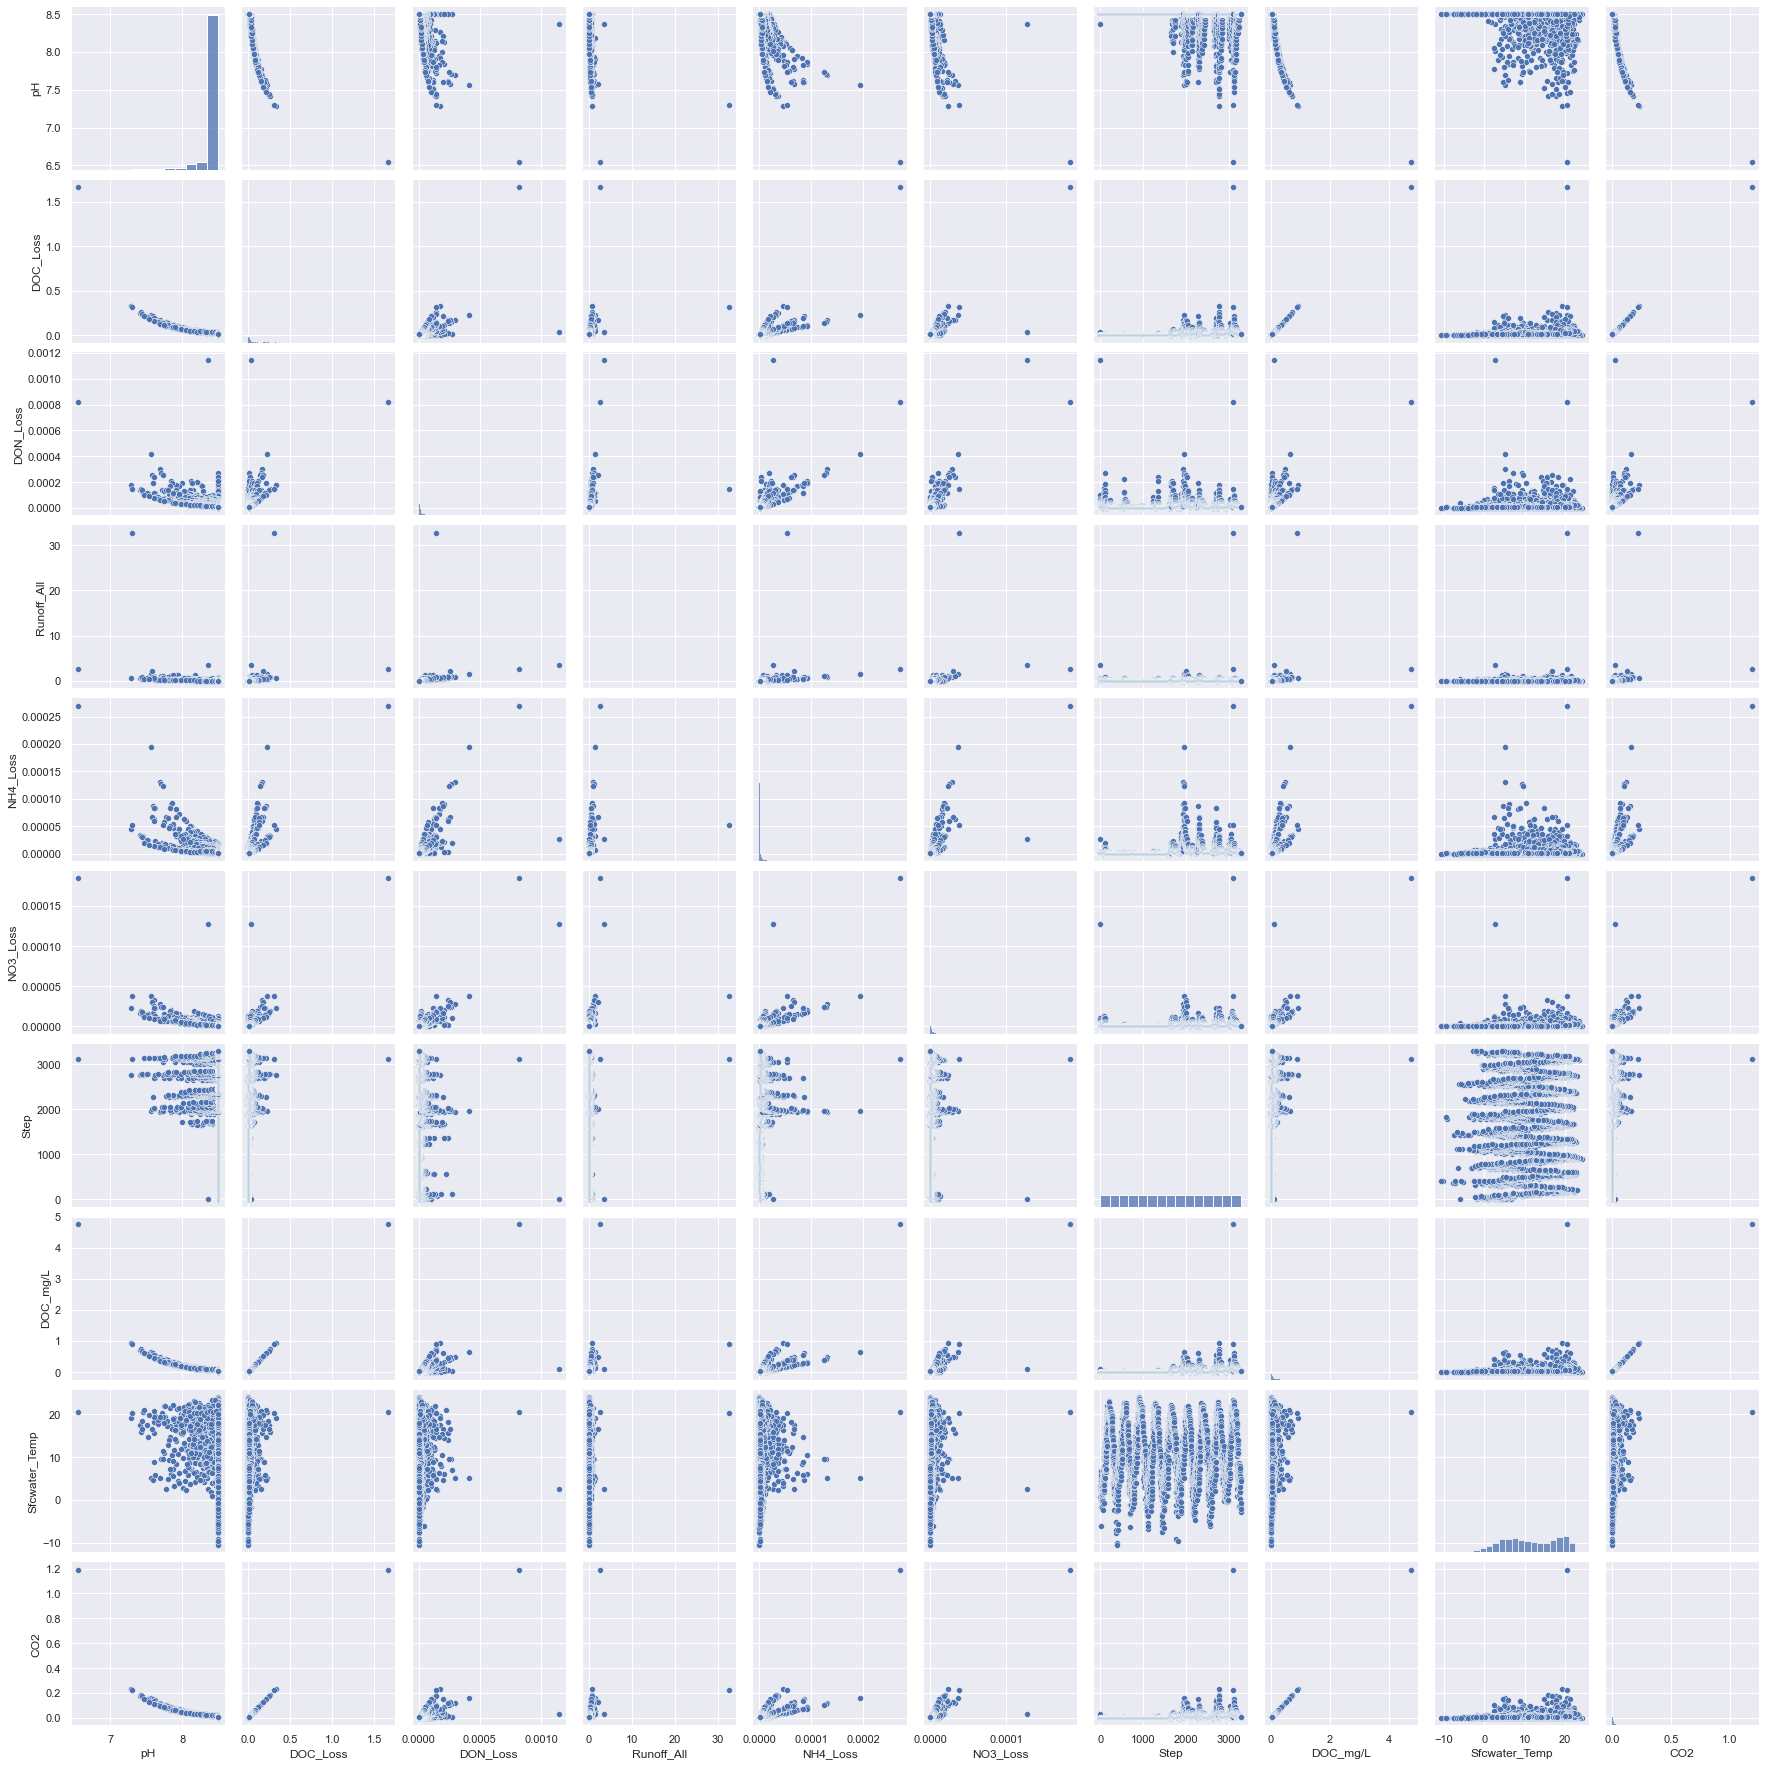

In [40]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

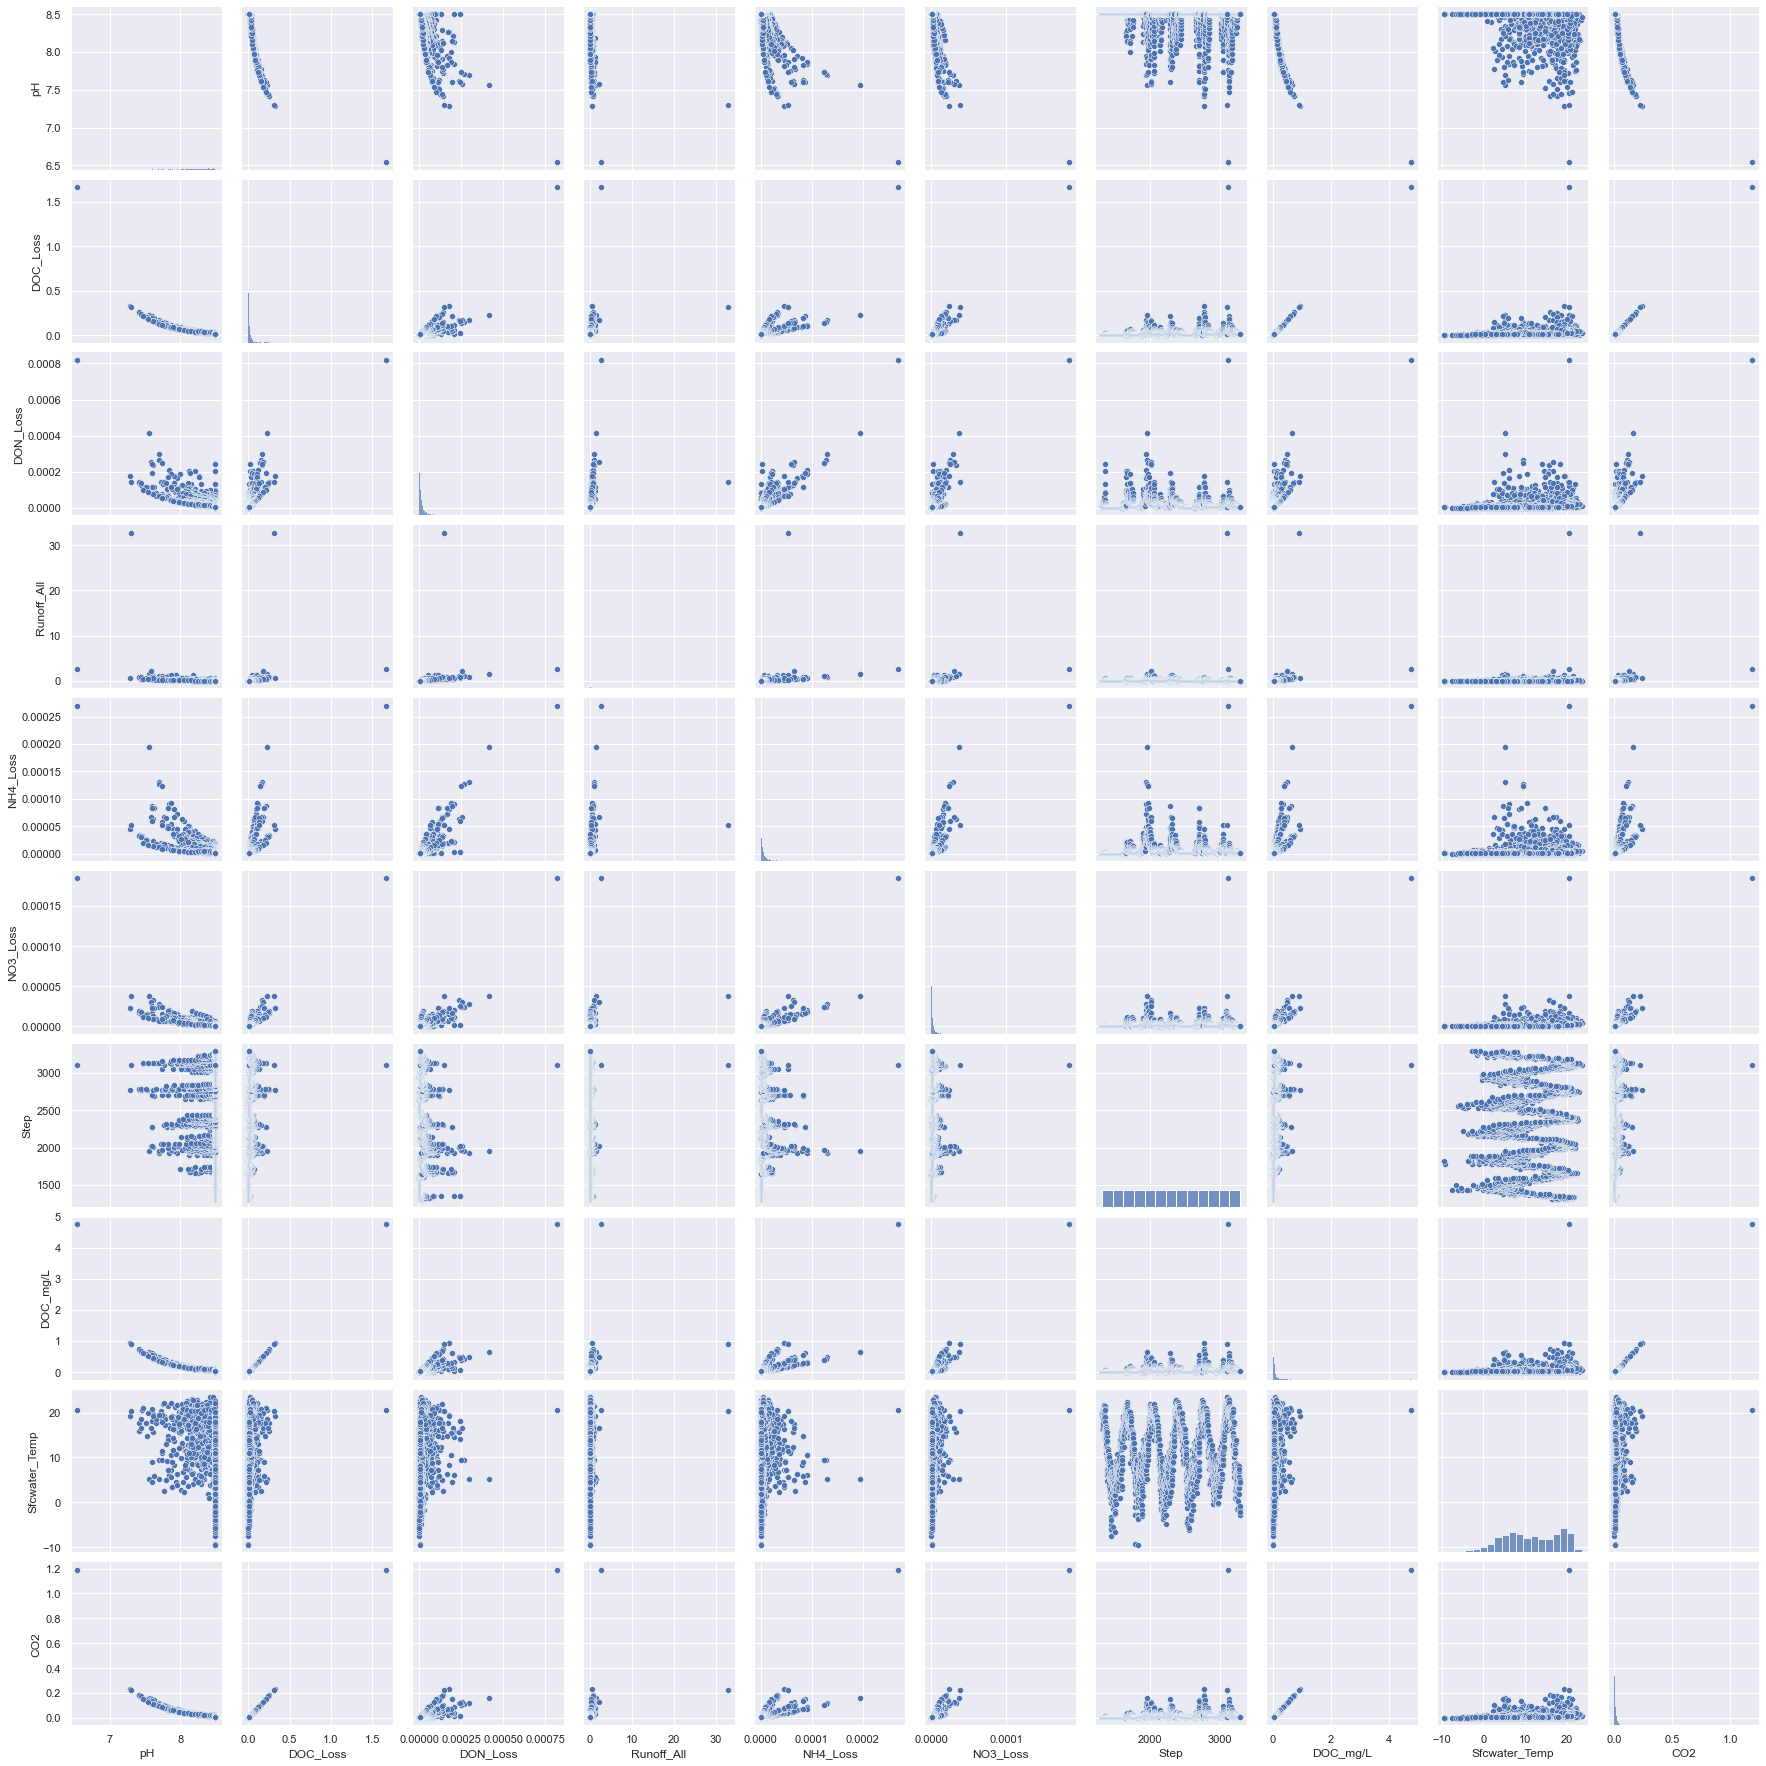

In [41]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

In [42]:
import numpy as np

In [43]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [44]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  3287.000000                             3287.000000   
mean      8.452489                                0.012778   
std       0.146250                                0.038125   
min       6.542243                                0.000010   
10%       8.324445                                0.000028   
25%       8.500000                                0.000083   
50%       8.500000                                0.002410   
75%       8.500000                                0.015793   
90%       8.500000                                0.032917   
max       8.500000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             1.581391e-05   
std                              3.706391e-05   
min                              1.531152e-07   
10%                              4.551938e-07   
25%                              1.233630e-06   
50%                              5.843098e-06   
75%                              1.654364e-05   
90%                              3.908298e-05   
max                              1.146204e-03   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.064498   
std                                 0.588327   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001197   
50%                                 0.011942   
75%                                 0.046786   
90%                                 0.141798   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             3.950409e-06   
std                              1.079366e-05   
min                              1.088774e-09   
10%                              1.042998e-08   
25%                              4.258997e-08   
50%                              8.112772e-07   
75%                              3.518954e-06   
90%                              9.929698e-06   
max                              2.702333e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.287000e+03  3287.000000       3287.000000   
mean                             1.564240e-06     0.036507         11.248536   
std                              4.811960e-06     0.108927          6.931090   
min                              1.490474e-11     0.000029        -10.562500   
10%                              2.183074e-10     0.000081          2.262500   
25%                              1.307638e-09     0.000236          5.787500   
50%                              4.017582e-07     0.006885         11.112499   
75%                              1.767648e-06     0.045122         17.712502   
90%                              4.009417e-06     0.094049         20.412498   
max                              1.844311e-04     4.762571         24.087502   

               CO2  
count  3287.000000  
mean      0.009127  
std       0.027232  
min       0.000007  
10%       0.000020  
25%       0.000059  
50%       0.001721  
75%       0.011281  
90%       0.023512  
max       1.190643

In [45]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1978.000000                             1978.000000   
mean      8.421115                                0.021017   
std       0.181848                                0.047373   
min       6.542243                                0.000030   
10%       8.188671                                0.000134   
25%       8.460005                                0.003692   
50%       8.500000                                0.012092   
75%       8.500000                                0.024660   
90%       8.500000                                0.044253   
max       8.500000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.117660e-05   
std                              3.658644e-05   
min                              3.802427e-07   
10%                              1.540704e-06   
25%                              4.596159e-06   
50%                              1.052122e-05   
75%                              2.343007e-05   
90%                              4.812122e-05   
max                              8.193804e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.093479   
std                                 0.751254   
min                                 0.000163   
10%                                 0.001745   
25%                                 0.009101   
50%                                 0.026392   
75%                                 0.078694   
90%                                 0.193820   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             6.365165e-06   
std                              1.333647e-05   
min                              1.220301e-08   
10%                              7.737041e-08   
25%                              8.970603e-07   
50%                              2.613383e-06   
75%                              6.322574e-06   
90%                              1.484967e-05   
max                              2.702333e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.978000e+03  1978.000000       1978.000000   
mean                             2.375409e-06     0.060049         11.347358   
std                              5.285885e-06     0.135352          6.693310   
min                              2.709295e-10     0.000086         -9.512501   
10%                              3.292321e-09     0.000383          2.765000   
25%                              4.383873e-07     0.010549          6.162500   
50%                              1.286505e-06     0.034550         11.300000   
75%                              2.805071e-06     0.070456         17.562500   
90%                              5.290832e-06     0.126438         20.037498   
max                              1.844311e-04     4.762571         23.487500   

               CO2  
count  1978.000000  
mean      0.015012  
std       0.033838  
min       0.000022  
10%       0.000096  
25%       0.002637  
50%       0.008637  
75%       0.017614  
90%       0.031610  
max       1.190643

In [46]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  313.0                              313.000000   
mean     8.5                                0.000535   
std      0.0                                0.001703   
min      8.5                                0.000030   
10%      8.5                                0.000034   
25%      8.5                                0.000041   
50%      8.5                                0.000087   
75%      8.5                                0.000358   
90%      8.5                                0.001182   
max      8.5                                0.019143   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             6.807274e-06   
std                              2.166121e-05   
min                              3.802427e-07   
10%                              4.348141e-07   
25%                              5.143244e-07   
50%                              1.098016e-06   
75%                              4.445583e-06   
90%                              1.506604e-05   
max                              2.428772e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.013547   
std                                 0.055060   
min                                 0.000163   
10%                                 0.000211   
25%                                 0.000280   
50%                                 0.000949   
75%                                 0.005879   
90%                                 0.027048   
max                                 0.669267   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.218804e-07   
std                              2.810034e-07   
min                              1.220301e-08   
10%                              1.596412e-08   
25%                              2.642449e-08   
50%                              5.345252e-08   
75%                              1.043285e-07   
90%                              2.332186e-07   
max                              3.163857e-06   

       NO3_Loss(gN/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.130000e+02  313.000000        313.000000   
mean                             5.835802e-08    0.001529          9.384385   
std                              2.086766e-07    0.004865          6.408665   
min                              2.709295e-10    0.000086         -7.412499   
10%                              3.206178e-10    0.000099          2.187500   
25%                              3.847091e-10    0.000117          5.037500   
50%                              8.650887e-10    0.000248          8.112500   
75%                              2.948719e-08    0.001023         14.787500   
90%                              1.374874e-07    0.003378         18.687500   
max                              2.280290e-06    0.054694         21.612500   

              CO2  
count  313.000000  
mean     0.000382  
std      0.001216  
min      0.000022  
10%      0.000025  
25%      0.000029  
50%      0.000062  
75%      0.000256  
90%      0.000845  
max      0.013674

In [47]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.406286                                0.024867   
std       0.194676                                0.050715   
min       6.542243                                0.000899   
10%       8.153602                                0.003503   
25%       8.399656                                0.007908   
50%       8.500000                                0.015476   
75%       8.500000                                0.028110   
90%       8.500000                                0.048767   
max       8.500000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.000024   
std                                  0.000038   
min                                  0.000001   
10%                                  0.000003   
25%                                  0.000006   
50%                                  0.000013   
75%                                  0.000027   
90%                                  0.000053   
max                                  0.000819   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.108505   
std                                 0.817647   
min                                 0.001940   
10%                                 0.006240   
25%                                 0.013945   
50%                                 0.034016   
75%                                 0.094504   
90%                                 0.217629   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             7.538827e-06   
std                              1.423350e-05   
min                              2.972375e-07   
10%                              8.679234e-07   
25%                              1.622665e-06   
50%                              3.340347e-06   
75%                              7.625915e-06   
90%                              1.715185e-05   
max                              2.702333e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.665000e+03  1665.000000       1665.000000   
mean                             2.810986e-06     0.071049         11.716374   
std                              5.655825e-06     0.144901          6.683227   
min                              1.189326e-07     0.002568         -9.512501   
10%                              4.034333e-07     0.010009          3.012500   
25%                              7.735493e-07     0.022594          6.462500   
50%                              1.631582e-06     0.044217         11.712500   
75%                              3.335750e-06     0.080313         18.012500   
90%                              5.995273e-06     0.139333         20.187500   
max                              1.844311e-04     4.762571         23.487500   

               CO2  
count  1665.000000  
mean      0.017762  
std       0.036225  
min       0.000642  
10%       0.002502  
25%       0.005649  
50%       0.011054  
75%       0.020078  
90%       0.034833  
max       1.190643

In [48]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'})

In [49]:
df_di_a.describe()

pH_1T   Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                             1978.000000   
mean      8.421115  2297.500000                                0.021017   
std       0.181848   571.143736                                0.047373   
min       6.542243  1309.000000                                0.000030   
25%       8.460005  1803.250000                                0.003692   
50%       8.500000  2297.500000                                0.012092   
75%       8.500000  2791.750000                                0.024660   
max       8.500000  3286.000000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.117660e-05   
std                              3.658644e-05   
min                              3.802427e-07   
25%                              4.596159e-06   
50%                              1.052122e-05   
75%                              2.343007e-05   
max                              8.193804e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.093479   
std                                 0.751254   
min                                 0.000163   
25%                                 0.009101   
50%                                 0.026392   
75%                                 0.078694   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average         Year  \
count                            1.978000e+03  1978.000000   
mean                             6.365165e-06  2003.769464   
std                              1.333647e-05     1.576393   
min                              1.220301e-08  2001.000000   
25%                              8.970603e-07  2002.000000   
50%                              2.613383e-06  2004.000000   
75%                              6.322574e-06  2005.000000   
max                              2.702333e-04  2006.000000   

       NO3_Loss(gN/day/m2)_Delineated_Average         Step     DOC_mg/L  \
count                            1.978000e+03  1978.000000  1978.000000   
mean                             2.375409e-06  2297.500000     0.060049   
std                              5.285885e-06   571.143736     0.135352   
min                              2.709295e-10  1309.000000     0.000086   
25%                              4.383873e-07  1803.250000     0.010549   
50%                              1.286505e-06  2297.500000     0.034550   
75%                              2.805071e-06  2791.750000     0.070456   
max                              1.844311e-04  3286.000000     4.762571   

       Sfc_Water_Temp_C          CO2  Alk_140  
count       1978.000000  1978.000000   1978.0  
mean          11.347358     0.015012    140.0  
std            6.693310     0.033838      0.0  
min           -9.512501     0.000022    140.0  
25%            6.162500     0.002637    140.0  
50%           11.300000     0.008637    140.0  
75%           17.562500     0.017614    140.0  
max           23.487500     1.190643    140.0

In [50]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [51]:
df_di_a_lr

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
slope     -6.554212e-05                            1.662269e-05   
intercept  8.571698e+00                           -1.717363e-02   
rvalue    -2.058526e-01                            2.004082e-01   
p-value    2.273080e-20                            2.279836e-19   
stderr     7.009199e-06                            1.828062e-06   

           DON_Loss(gN/day/m2)_Delineated_Average  \
slope                               -3.783863e-09   
intercept                            2.987002e-05   
rvalue                              -5.906914e-02   
p-value                              8.596002e-03   
stderr                               1.438541e-09   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                   0.000039   
intercept                               0.003693   
rvalue                                  0.029711   
p-value                                 0.186558   
stderr                                  0.000030   

           NH4_Loss(gN/day/m2)_Delineated_Average         Year  \
slope                                1.000945e-09     0.002713   
intercept                            4.065493e-06  1997.536209   
rvalue                               4.286618e-02     0.982970   
p-value                              5.663309e-02     0.000000   
stderr                               5.248108e-10     0.000011   

           NO3_Loss(gN/day/m2)_Delineated_Average  Step      DOC_mg/L  \
slope                                1.178990e-09   1.0  4.749340e-05   
intercept                           -3.333214e-07   0.0 -4.906750e-02   
rvalue                               1.273908e-01   1.0  2.004082e-01   
p-value                              1.306118e-08   0.0  2.279836e-19   
stderr                               2.065028e-10   0.0  5.223036e-06   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758  1.187335e-05      0.0  
intercept          9.606002 -1.226688e-02    140.0  
rvalue             0.064675  2.004082e-01      0.0  
p-value            0.004007  2.279836e-19      1.0  
stderr             0.000263  1.305759e-06      0.0

In [52]:
df_pools_dif.head()

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            4.914795                          178.441696   
1                            4.915759                          178.600606   
2                            4.916773                          178.762523   
3                            4.917767                          178.922577   
4                            4.918738                          179.075808   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.653129                            0.017829   
1                            0.656923                            0.018524   
2                            0.652833                            0.018774   
3                            0.649692                            0.018661   
4                            0.648918                            0.018418   

   Step  Runoff_All(mm/day)_Delineated_Average  
0  1309                               0.014679  
1  1310                               0.022896  
2  1311                               0.028915  
3  1312                               0.020605  
4  1313                               0.015855

In [53]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average'].values;
datetime_series = pd.date_range('1998-01-01', periods=3287, freq='D'); #When no date file is executed from DOC Check
datetime_series[1309:3288];
df_di_a['Date'] = datetime_series[1309:3288].values;

<ipython-input-53-e3b78498b3f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values;
<ipython-input-53-e3b78498b3f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
<ipython-input-53-e3b78498b3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [54]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-54-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [55]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                             1978.000000   
mean      8.421115  2297.500000                                0.021017   
std       0.181848   571.143736                                0.047373   
min       6.542243  1309.000000                                0.000030   
10%       8.188671  1506.700000                                0.000134   
25%       8.460005  1803.250000                                0.003692   
50%       8.500000  2297.500000                                0.012092   
75%       8.500000  2791.750000                                0.024660   
90%       8.500000  3088.300000                                0.044253   
max       8.500000  3286.000000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             2.117660e-05   
std                              3.658644e-05   
min                              3.802427e-07   
10%                              1.540704e-06   
25%                              4.596159e-06   
50%                              1.052122e-05   
75%                              2.343007e-05   
90%                              4.812122e-05   
max                              8.193804e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.093479   
std                                 0.751254   
min                                 0.000163   
10%                                 0.001745   
25%                                 0.009101   
50%                                 0.026392   
75%                                 0.078694   
90%                                 0.193820   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average         Year  \
count                            1.978000e+03  1978.000000   
mean                             6.365165e-06  2003.769464   
std                              1.333647e-05     1.576393   
min                              1.220301e-08  2001.000000   
10%                              7.737041e-08  2002.000000   
25%                              8.970603e-07  2002.000000   
50%                              2.613383e-06  2004.000000   
75%                              6.322574e-06  2005.000000   
90%                              1.484967e-05  2006.000000   
max                              2.702333e-04  2006.000000   

       NO3_Loss(gN/day/m2)_Delineated_Average         Step     DOC_mg/L  \
count                            1.978000e+03  1978.000000  1978.000000   
mean                             2.375409e-06  2297.500000     0.060049   
std                              5.285885e-06   571.143736     0.135352   
min                              2.709295e-10  1309.000000     0.000086   
10%                              3.292321e-09  1506.700000     0.000383   
25%                              4.383873e-07  1803.250000     0.010549   
50%                              1.286505e-06  2297.500000     0.034550   
75%                              2.805071e-06  2791.750000     0.070456   
90%                              5.290832e-06  3088.300000     0.126438   
max                              1.844311e-04  3286.000000     4.762571   

       Sfc_Water_Temp_C          CO2  Alk_140     DOC_Pool     NH4_Pool  \
count       1978.000000  1978.000000   1978.0  1978.000000  1978.000000   
mean          11.347358     0.015012    140.0  1850.154128     3.900232   
std            6.693310     0.033838      0.0  1193.881659     1.856082   
min           -9.512501     0.000022    140.0   178.441696     0.635454   
10%            2.765000     0.000096    140.0   190.056750     1.065425   
25%            6.162500     0.002637    140.0   802.891824     2.561748   
50%           11.300000     0.008637    140.0  1741.933419     4.053014   
75%      

In [56]:
df_di_a.head()

pH_1T  Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
1309    8.5        1309                                0.000691   
1310    8.5        1310                                0.000951   
1311    8.5        1311                                0.001263   
1312    8.5        1312                                0.000954   
1313    8.5        1313                                0.000756   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014679   
1310                               0.022896   
1311                               0.028915   
1312                               0.020605   
1313                               0.015855   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
1309                            9.971300e-08  2001   
1310                            1.433506e-07  2001   
1311                            1.811217e-07  2001   
1312                            1.315092e-07  2001   
1313                            1.030502e-07  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                            9.611801e-08  1309  0.001973   
1310                            1.380132e-07  1310  0.002716   
1311                            1.859344e-07  1311  0.003608   
1312                            1.394759e-07  1312  0.002727   
1313                            1.088426e-07  1313  0.002161   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1309         20.112500  0.000493      140   Prefire    Meets  178.441696   
1310         19.737500  0.000679      140   Prefire    Meets  178.600606   
1311         19.962502  0.000902      140   Prefire    Meets  178.762523   
1312         19.812500  0.000682      140   Prefire    Meets  178.922577   
1313         19.287498  0.000540      140   Prefire    Meets  179.075808   

      NH4_Pool  NO3_Pool       Date  
1309  0.653129  0.017829 2001-08-02  
1310  0.656923  0.018524 2001-08-03  
1311  0.652833  0.018774 2001-08-04  
1312  0.649692  0.018661 2001-08-05  
1313  0.648918  0.018418 2001-08-06

In [57]:
#Defining all as Meets so that the .loc of the criteria mask will set the criteria to exceeds
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [58]:
#Setting EPA Criteria Mask for those days where exceedance occured for NH4 or NO3 based on pH calculation
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [59]:
#Those that 'exceed' drink water standards
criteria_mask
#export criteria mask to csv
#criteria_mask.to_csv('11192115OCTF_WQX_Exceedance.csv')

In [60]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [61]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [62]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC15OCT21f_exceed_allstats.csv')

In [63]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC15OCT21f_exceed_pfstats.csv')

In [64]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC15OCT21f_exceed_pofstats.csv')

In [65]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
1309    8.5        1309                                0.000691   
1310    8.5        1310                                0.000951   
1311    8.5        1311                                0.001263   
1312    8.5        1312                                0.000954   
1313    8.5        1313                                0.000756   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1309                                0.000009   
1310                                0.000012   
1311                                0.000016   
1312                                0.000012   
1313                                0.000010   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014679   
1310                               0.022896   
1311                               0.028915   
1312                               0.020605   
1313                               0.015855   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
1309                            9.971300e-08  2001   
1310                            1.433506e-07  2001   
1311                            1.811217e-07  2001   
1312                            1.315092e-07  2001   
1313                            1.030502e-07  2001   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                            9.611801e-08  1309  0.001973   
1310                            1.380132e-07  1310  0.002716   
1311                            1.859344e-07  1311  0.003608   
1312                            1.394759e-07  1312  0.002727   
1313                            1.088426e-07  1313  0.002161   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1309         20.112500  0.000493      140   Prefire  Exceeds  178.441696   
1310         19.737500  0.000679      140   Prefire  Exceeds  178.600606   
1311         19.962502  0.000902      140   Prefire  Exceeds  178.762523   
1312         19.812500  0.000682      140   Prefire  Exceeds  178.922577   
1313         19.287498  0.000540      140   Prefire  Exceeds  179.075808   

      NH4_Pool  NO3_Pool       Date  
1309  0.653129  0.017829 2001-08-02  
1310  0.656923  0.018524 2001-08-03  
1311  0.652833  0.018774 2001-08-04  
1312  0.649692  0.018661 2001-08-05  
1313  0.648918  0.018418 2001-08-06

In [66]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [67]:
#Brush Creek Pre-fire linear #.to_csv('111921BC15OCT21f_pflr.csv')regression
bc_pf_lr;
#bc_pf_lr.to_csv('111921BC15OCT21f_pflr.csv')

In [68]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire'] 
bc_pof.head()
#bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  Unnamed: 0  DOC_Loss(gC/day/m2)_Delineated_Average  \
1622    8.5        1622                                0.001025   
1623    8.5        1623                                0.001129   
1624    8.5        1624                                0.001271   
1625    8.5        1625                                0.001203   
1626    8.5        1626                                0.001164   

      DON_Loss(gN/day/m2)_Delineated_Average  \
1622                                0.000012   
1623                                0.000013   
1624                                0.000014   
1625                                0.000013   
1626                                0.000012   

      Runoff_All(mm/day)_Delineated_Average  \
1622                               0.020572   
1623                               0.022964   
1624                               0.024340   
1625                               0.022225   
1626                               0.020637   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  \
1622                            2.972375e-07  2002   
1623                            3.756166e-07  2002   
1624                            4.617054e-07  2002   
1625                            4.750123e-07  2002   
1626                            4.939790e-07  2002   

      NO3_Loss(gN/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1622                            1.189326e-07  1622  0.002929   
1623                            1.462828e-07  1623  0.003226   
1624                            1.613892e-07  1624  0.003632   
1625                            1.728960e-07  1625  0.003438   
1626                            1.908447e-07  1626  0.003327   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1622         17.262500  0.000732      140  Postfire  Exceeds  199.574127   
1623         15.687500  0.000806      140  Postfire  Exceeds  203.006483   
1624         18.387500  0.000908      140  Postfire  Exceeds  207.786386   
1625         16.662500  0.000860      140  Postfire  Exceeds  211.675502   
1626         15.012501  0.000832      140  Postfire  Exceeds  214.808044   

      NH4_Pool  NO3_Pool       Date  
1622  0.850360  0.015481 2002-06-11  
1623  0.887285  0.017551 2002-06-12  
1624  0.919812  0.017743 2002-06-13  
1625  0.952669  0.020416 2002-06-14  
1626  0.983706  0.023559 2002-06-15

In [69]:
bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0', 'Year', 'Step'})

pH_1T  DOC_Loss(gC/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.406286                                0.024867   
std       0.194676                                0.050715   
min       6.542243                                0.000899   
10%       8.153602                                0.003503   
25%       8.399656                                0.007908   
50%       8.500000                                0.015476   
75%       8.500000                                0.028110   
90%       8.500000                                0.048767   
max       8.500000                                1.666900   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.000024   
std                                  0.000038   
min                                  0.000001   
10%                                  0.000003   
25%                                  0.000006   
50%                                  0.000013   
75%                                  0.000027   
90%                                  0.000053   
max                                  0.000819   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.108505   
std                                 0.817647   
min                                 0.001940   
10%                                 0.006240   
25%                                 0.013945   
50%                                 0.034016   
75%                                 0.094504   
90%                                 0.217629   
max                                32.761269   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             7.538827e-06   
std                              1.423350e-05   
min                              2.972375e-07   
10%                              8.679234e-07   
25%                              1.622665e-06   
50%                              3.340347e-06   
75%                              7.625915e-06   
90%                              1.715185e-05   
max                              2.702333e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.665000e+03  1665.000000       1665.000000   
mean                             2.810986e-06     0.071049         11.716374   
std                              5.655825e-06     0.144901          6.683227   
min                              1.189326e-07     0.002568         -9.512501   
10%                              4.034333e-07     0.010009          3.012500   
25%                              7.735493e-07     0.022594          6.462500   
50%                              1.631582e-06     0.044217         11.712500   
75%                              3.335750e-06     0.080313         18.012500   
90%                              5.995273e-06     0.139333         20.187500   
max                              1.844311e-04     4.762571         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1665.000000   1665.0  1665.000000  1665.000000  1665.000000  
mean      0.017762    140.0  2162.458068     4.447143     0.581152  
std       0.036225      0.0  1037.654823     1.479879     0.364026  
min       0.000642    140.0   199.574127     0.850360     0.015481  
10%       0.002502    140.0   789.043370     2.527385     0.229850  
25%       0.005649    140.0  1285.323748     3.464150     0.280950  
50%       0.011054    140.0  2291.998465     4.318365     0.539346  
75%       0.020078    140.0  3131.205357     5.401192     0.802542  
90%       0.034833    140.0  3570.751674     6.522978     1.164841  
max       1.190643    140.0  3926.978237     7.870530     1.908474

In [70]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [71]:
bc_pof_lr;
#bc_pof_lr.to_csv('111921BC15OCT21f_poflr.csv')

In [72]:
 #Oneway ANOVA between pre and post fire nitrates
stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=781.7488620328896, pvalue=3.137773841351178e-145)

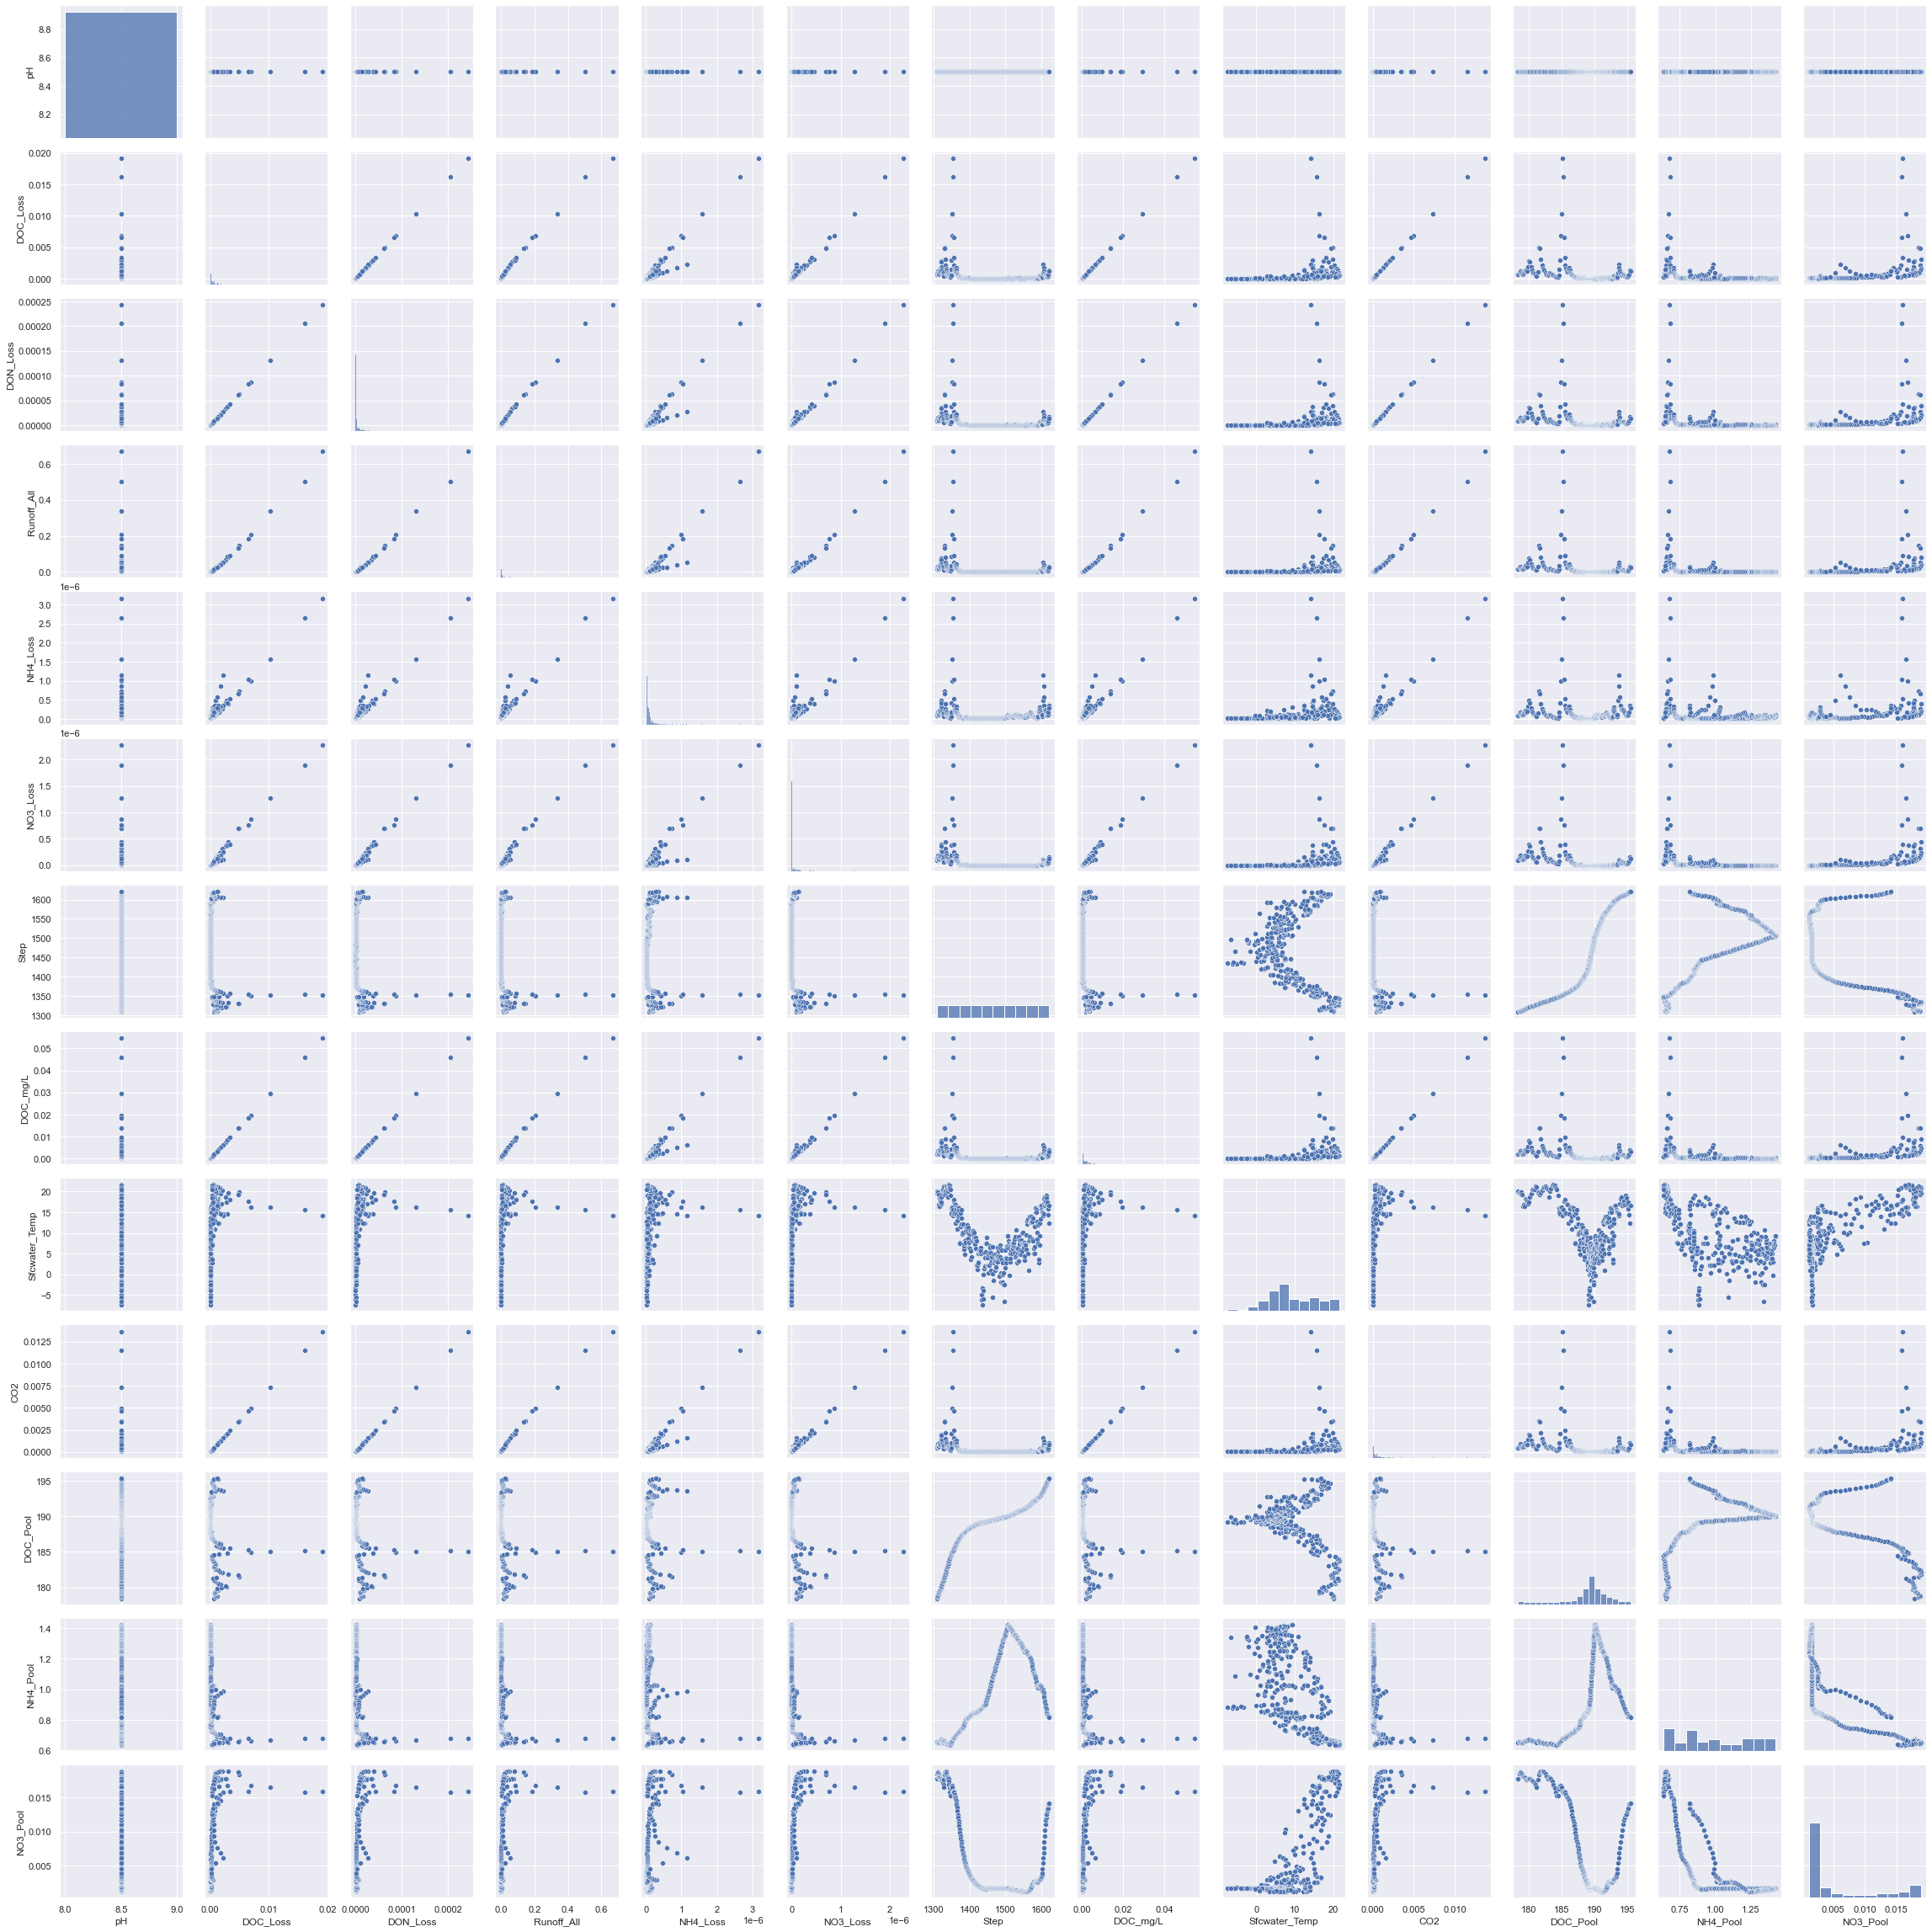

In [73]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

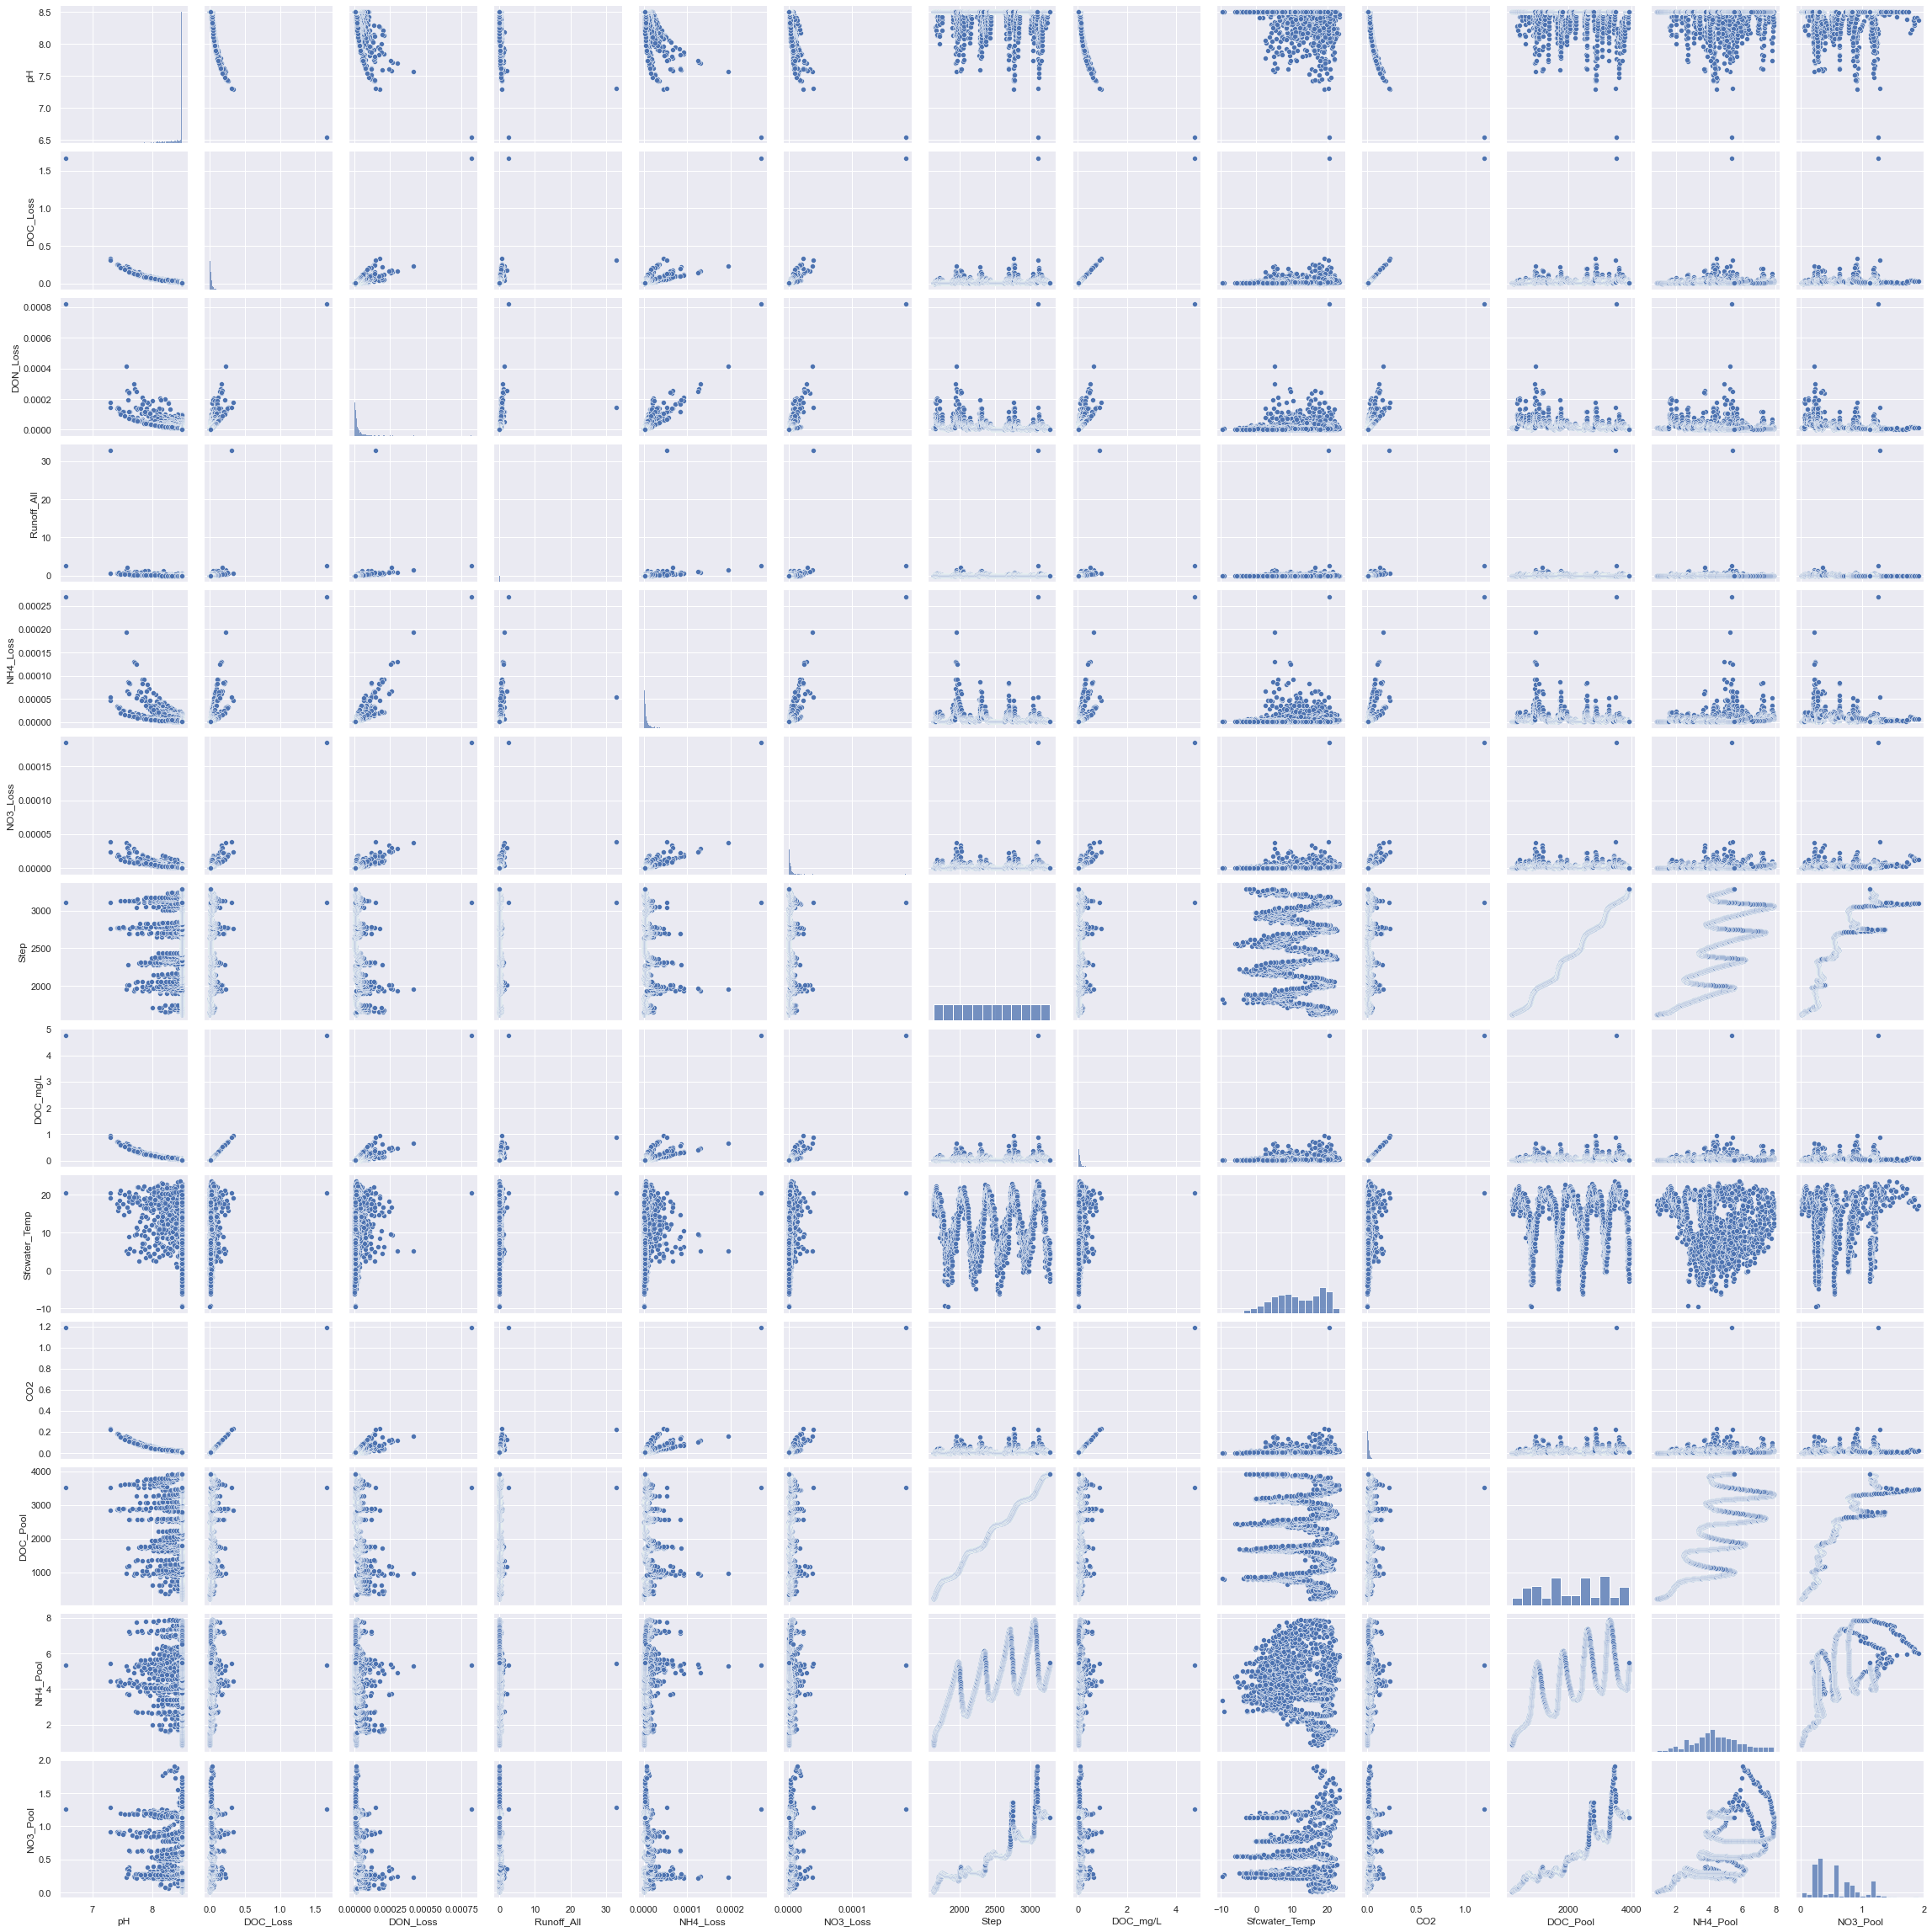

In [74]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

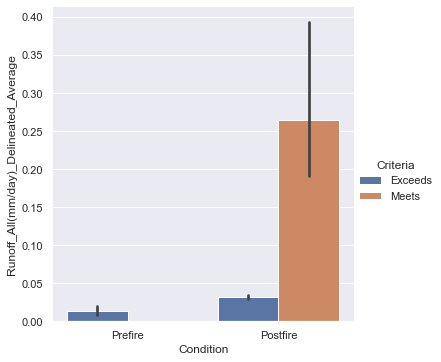

In [75]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

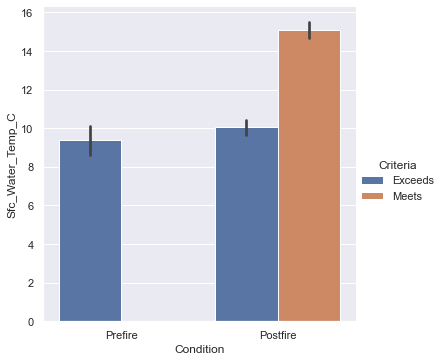

In [76]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

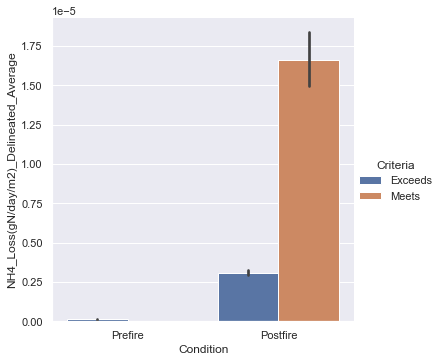

In [77]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

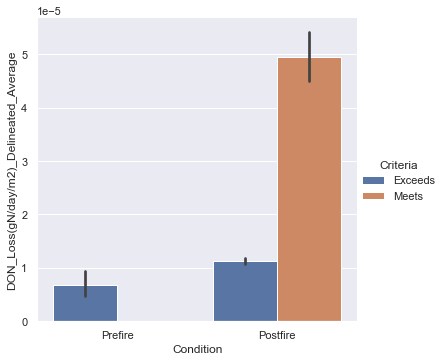

In [78]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

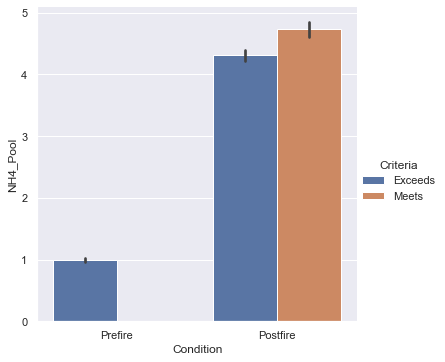

In [79]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

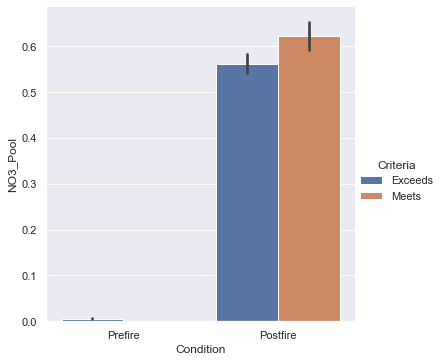

In [80]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

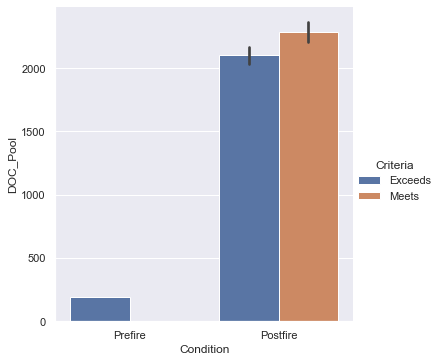

In [81]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

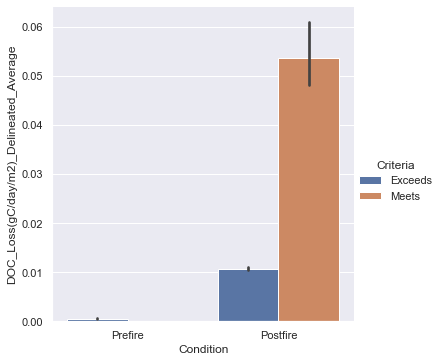

In [82]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [83]:
df_di_a#.to_csv('111921_BC15OCT21F_WQX_All_di.csv')

In [84]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [85]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


In [86]:
#data_df.head()